## Setup

In [1]:
%run ../setup.ipynb

## Carico dati per l'analisi

In [2]:
# cartella dove ci sono i dati da analizzare
folder = "../setup_dati/"

# importo dati
df_all = pd.read_csv(folder+"df_all_data.csv", sep=',').drop(columns=['Unnamed: 0'])
df_all["doc_index"] = df_all["doc_index"].apply(str)
df_all = calcola_scarto(df_all)

In [3]:
# importo df con i dati dei workers
df_workers_answer =  pd.read_csv("../../data/prolific/Dataframe/workers_questionnaire.csv", sep=',')
 
# visualizzo dati
df_workers_answer[["worker_id","questionnaire_index","question_attribute_name","question_attribute_text","question_answer_value","question_answers_labels","question_answer_text",'question_answer_mapping_index', 'question_answer_mapping_key',
       'question_answer_mapping_label', 'question_answer_mapping_value']]

,worker_id,questionnaire_index,question_attribute_name,question_attribute_text,question_answer_value,question_answers_labels,question_answer_text,question_answer_mapping_index,question_answer_mapping_key,question_answer_mapping_label,question_answer_mapping_value
0,62c61250e85c96fc1794c7db,0.0,age,What is your age range?,2.0,0-18:::19-25:::26-35:::36-50:::51-80:::81+,26-35,NaN,NaN,NaN,NaN
1,62c61250e85c96fc1794c7db,0.0,school,What is the highest level of school you have c...,3.0,High school incomplete or less:::High school g...,Four year college degree/bachelorâs degree,NaN,NaN,NaN,NaN
2,62c61250e85c96fc1794c7db,0.0,taxes,Last year what was your total family income fr...,2.0,"Less than 10,000$:::10,000$ to less than 20,00...","20,000$ to less than 30,000$",NaN,NaN,NaN,NaN
3,62c61250e85c96fc1794c7db,0.0,political_views,"In general, would you describe your political ...",3.0,Very conservative:::Conservative:::Moderate:::...,Liberal,NaN,NaN,NaN,NaN
4,62c61250e85c96fc1794c7db,0.0,consideration,"In politics today, do you consider yourself a",1.0,Republican:::Democrat:::Independent:::Somethin...,Democrat,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6185,629e3b29a4c6a6994feefef8,2.0,k_info_2,Everyone gets the same information when they s...,3.0,NaN,NaN,2.0,dont_know,I don't know,3.0
6186,629e3b29a4c6a6994feefef8,2.0,k_info_3,Some people make money by spreading fake news ...,2.0,NaN,NaN,1.0,definetely_true,Definetely true,2.0
6187,629e3b29a4c6a6994feefef8,2.0,k_crea_2,Some people are paid to use products in the vi...,2.0,NaN,NaN,1.0,definetely_true,Definetely true,2.0
6188,629e3b29a4c6a6994feefef8,2.0,k_ai_2,Websites and apps for news and entertainment s...,3.0,NaN,NaN,2.0,dont_know,I don't know,3.0


In [4]:
df_workers_answer[df_workers_answer["questionnaire_index"] == 1.0]["question_answer_text"]

7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
       ... 
6179    NaN
6180    NaN
6181    NaN
6182    NaN
6183    NaN
Name: question_answer_text, Length: 2827, dtype: object

In [5]:
df_workers_answer[["questionnaire_index","question_attribute_name","question_attribute_text"]].drop_duplicates()

,questionnaire_index,question_attribute_name,question_attribute_text
0,0.0,age,What is your age range?
1,0.0,school,What is the highest level of school you have c...
2,0.0,taxes,Last year what was your total family income fr...
3,0.0,political_views,"In general, would you describe your political ..."
4,0.0,consideration,"In politics today, do you consider yourself a"
5,0.0,southern_border,Should the U.S. Government build a wall along ...
6,0.0,environment,Should the U.S. Government adopt better polici...
7,1.0,s_info_1,I know how to choose good keywords for online ...
8,1.0,s_info_3_v2,I know how I can find answers to my questions ...
9,1.0,s_info_4,I know how I can use search functions in searc...


notiamo che :
- se questionnaire_index = 0 -> risposta in question_answers_labels e question_answer_text

- se questionnaire_index = 1 -> risposta in question_answer_mapping_index e question_answer_mapping_key

        domanda = question_attribute_text
        risposta con index -> key :
        0 -> definetely_untrue
        1 -> slightly_untrue
        2 -> not_true_and_not_untrue
        3 -> slightly_true
        4 -> completely_true
        5 -> completely_untrue
        6 -> not_answer

- se questionnaire_index = 2 -> risposta in question_answer_mapping_index e question_answer_mapping_key

        domanda = question_attribute_text
        risposta con index -> key :
        0 -> definetely_untrue
        1 -> definetely_true
        2 -> dont_know
        3 -> dont_understand

In [6]:
for attribute in df_workers_answer["question_attribute_name"].unique():
    print(attribute,":",df_workers_answer[df_workers_answer["question_attribute_name"] == attribute]["question_attribute_text"].unique()[0])
    

age : What is your age range?
school : What is the highest level of school you have completed or the highest degree you have received?
taxes : Last year what was your total family income from all sources, before taxes?
political_views : In general, would you describe your political views as
consideration : In politics today, do you consider yourself a
southern_border : Should the U.S. Government build a wall along the southern border?
environment : Should the U.S. Government adopt better policies to prevent climate change?
s_info_1 : I know how to choose good keywords for online searches (for example with Google)
s_info_3_v2 : I know how I can find answers to my questions on the internet
s_info_4 : I know how I can use search functions in search engines (for example with Google)
s_info_5 : I know how I can check if the information I find on the internet is true
s_info_6 : I know how I can check if a website is reliable
s_info_7 : I can assess what the goal of online information is (e.g

In [7]:
# filtro i workers che hanno risposto a tutte le domande
lista_worker = df_all["worker_id"].unique()
sub = df_workers_answer[df_workers_answer["worker_id"].isin(lista_worker)]

In [8]:
len(lista_worker)

200

In [9]:
df_momentaneo = {}

for id in lista_worker: 
    df_momentaneo[id] = {"age_ans_index" : 0,
              "age_ans_label"  : 0,
              "school_ans_index"  : 0,
              "school_ans_label" : 0,
              "taxes_ans_index" : 0,
              "taxes_ans_label" : 0,
              "political_views_ans_index" : 0,
              "political_views_ans_label" : 0,
              "consideration_ans_index" : 0,
              "consideration_ans_label" : 0,
              "southern_border_ans_index" : 0,
              "southern_border_ans_label" : 0,
              ###
              's_info_1_ans_index' : 0, 
              's_info_1_ans_label' : 0, 
              's_info_3_v2_ans_index' : 0,
              's_info_3_v2_ans_label' : 0,
              's_info_4_ans_index' : 0, 
              's_info_4_ans_label' : 0, 
              's_info_5_ans_index' : 0, 
              's_info_5_ans_label' : 0, 
              's_info_6_ans_index' : 0, 
              's_info_6_ans_label' : 0, 
              's_info_7_ans_index' : 0, 
              's_info_7_ans_label' : 0, 
              's_com_1_v2_ans_index' : 0,
              's_com_1_v2_ans_label' : 0,
              's_com_2_ans_index' : 0,
              's_com_2_ans_label' : 0,
              
              ###
              'k_info_1_ans_index' : 0, 
              'k_info_1_ans_label' : 0, 
              'k_info_2_ans_index' : 0,
              'k_info_2_ans_label' : 0,
              'k_info_3_ans_index': 0, 
              'k_info_3_ans_label': 0, 
              'k_crea_2_ans_index': 0, 
              'k_crea_2_ans_label': 0, 
              'k_ai_2_ans_index': 0, 
              'k_ai_2_ans_label': 0, 
              'k_ai_4_ans_index': 0,
              'k_ai_4_ans_label': 0
                       
              }


In [10]:
for row in sub.iterrows():
    if row[1]["worker_id"] in df_momentaneo:
        if row[1]["questionnaire_index"] == 0:
            df_momentaneo[row[1]["worker_id"]][row[1]["question_attribute_name"]+"_ans_index"] = row[1]["question_answer_value"]
            df_momentaneo[row[1]["worker_id"]][row[1]["question_attribute_name"]+"_ans_label"] = row[1]["question_answer_text"]
        else:
            df_momentaneo[row[1]["worker_id"]][row[1]["question_attribute_name"]+"_ans_index"] = row[1]["question_answer_mapping_index"]
            df_momentaneo[row[1]["worker_id"]][row[1]["question_attribute_name"]+"_ans_label"] = row[1]["question_answer_mapping_key"]

In [11]:
df_momentaneo

{'55b645b1fdf99b1c02906872': {'age_ans_index': 4.0,
  'age_ans_label': '51-80',
  'school_ans_index': 3.0,
  'school_ans_label': 'Four year college degree/bachelorâ\x80\x99s degree',
  'taxes_ans_index': 8.0,
  'taxes_ans_label': '150,000$ or more',
  'political_views_ans_index': 0.0,
  'political_views_ans_label': 'Very conservative',
  'consideration_ans_index': 0.0,
  'consideration_ans_label': 'Republican',
  'southern_border_ans_index': 0.0,
  'southern_border_ans_label': 'Agree',
  's_info_1_ans_index': 3.0,
  's_info_1_ans_label': 'slightly_true',
  's_info_3_v2_ans_index': 3.0,
  's_info_3_v2_ans_label': 'slightly_true',
  's_info_4_ans_index': 3.0,
  's_info_4_ans_label': 'slightly_true',
  's_info_5_ans_index': 4.0,
  's_info_5_ans_label': 'completely_true',
  's_info_6_ans_index': 3.0,
  's_info_6_ans_label': 'slightly_true',
  's_info_7_ans_index': 4.0,
  's_info_7_ans_label': 'completely_true',
  's_com_1_v2_ans_index': 4.0,
  's_com_1_v2_ans_label': 'completely_true',
  '

In [12]:
df_momentaneo = pd.DataFrame.from_dict(df_momentaneo, orient='index')
df_momentaneo = df_momentaneo.dropna()

colonne = df_momentaneo.columns

for colonna in colonne:
    df_momentaneo[colonna] = df_momentaneo[colonna].apply(str)

In [13]:
for colonna in colonne:
    df_all[colonna] = 0
    
for id_worker,row in df_momentaneo.iterrows():
    for colonna in colonne:
        df_all.loc[df_all["worker_id"] == id_worker, colonna] = row[colonna]

colonne.to_list()
tenere = ["worker_id","doc_id","doc_fact_check_ground_truth_label","doc_fact_check_ground_truth_value","sovra", "quartile","doc_truthfulness_value","mean","scarto","doc_truthfulness_index"] + colonne.to_list()

# creo un nuovo df con solo le colonne che mi interessano per questa analisi
df_for_Q1 = df_all[tenere]

In [14]:
for w in df_for_Q1["worker_id"].unique():
    if w not in df_momentaneo.index:
        df_for_Q1 = df_for_Q1[df_for_Q1.worker_id != w]

In [15]:
df_for_Q1.to_csv("../Datasets/df_Q1.csv", sep=",", index=False)

In [16]:
mapping = {}


for i in range(0,len(colonne),2):
    index = colonne[i]
    
    mapping[index[:-10]] = {"text":""}
    
    #print(index[:-6],df_workers_answer[df_workers_answer["question_attribute_name"] == index[:-10]]["question_attribute_text"].unique())
    
    mapping[index[:-10]]["text"] = df_workers_answer[df_workers_answer["question_attribute_name"] == index[:-10]]["question_attribute_text"].unique()[0]
    
    valori = df_for_Q1[index].unique()
    for valore in valori:
        label = df_for_Q1[df_for_Q1[index] == valore][colonne[i+1]].unique()[0]
        #print(valore,"->",label)
        mapping[index[:-10]][valore] = label
        
    #print("\n")

In [17]:
mapping

{'age': {'text': 'What is your age range?',
  '4.0': '51-80',
  '3.0': '36-50',
  '2.0': '26-35',
  '1.0': '19-25',
  '5.0': '81+',
  '0.0': '0-18'},
 'school': {'text': 'What is the highest level of school you have completed or the highest degree you have received?',
  '3.0': 'Four year college degree/bachelorâ\x80\x99s degree',
  '5.0': 'Postgraduate or professional degree, including masterâ\x80\x99s, doctorate, medical or law degree',
  '1.0': 'High school graduate or GED (includes technical/vocational training that doesnâ\x80\x99t towards college credit)',
  '2.0': 'Some college (some community college, associateâ\x80\x99s degree)',
  '4.0': 'Some postgraduate or professional schooling, no postgraduate degree',
  '0.0': 'High school incomplete or less'},
 'taxes': {'text': 'Last year what was your total family income from all sources, before taxes?',
  '8.0': '150,000$ or more',
  '7.0': '100,000$ to less than 150,000$',
  '4.0': '40,000$ to less than 50,000$',
  '5.0': '50,000$ to

In [18]:
df_for_Q1["correct_false"] = 0
df_for_Q1["correct_true"] = 0
df_for_Q1["wrong_false"] = 0
df_for_Q1["wrong_true"] = 0

for index, row in df_for_Q1.iterrows():
    if row ["quartile"] == "correct_false":
        df_for_Q1.loc[index, "correct_false"] = 1
    if row ["quartile"] == "correct_true":
        df_for_Q1.loc[index, "correct_true"] = 1
    if row ["quartile"] == "wrong_false":
        df_for_Q1.loc[index, "wrong_false"] = 1
    if row ["quartile"] == "wrong_true":
        df_for_Q1.loc[index, "wrong_true"] = 1

In [19]:
# creo i vari df per le analisi
def crea_df_per_analisi(df_analisi):
    df_all = df_analisi.copy()

    df_false = df_analisi[df_analisi["sovra"] == "pants-on-fire"]
    df_true = df_analisi[df_analisi["sovra"] == "true"]

    df_wrong_false = df_analisi[df_analisi["quartile"] == "wrong_false"]
    df_correct_false = df_analisi[df_analisi["quartile"] == "correct_false"]
    df_wrong_true = df_analisi[df_analisi["quartile"] == "wrong_true"]
    df_correct_true = df_analisi[df_analisi["quartile"] == "correct_true"]

    df_wrong = df_wrong_false.append(df_wrong_true)
    df_correct = df_correct_true.append(df_correct_false)

    DF_no_quartili = [["df_all",df_all],["df_false",df_false],["df_true",df_true],["df_wrong",df_wrong],["df_correct",df_correct]]
    DF = [["df_all",df_all],["df_false",df_false],["df_true",df_true],["df_wrong",df_wrong],["df_correct",df_correct],["df_wrong_false",df_wrong_false],["df_correct_false",df_correct_false],["df_correct_true",df_correct_true],["df_wrong_true",df_wrong_true]]
    return df_all, df_false, df_true , df_wrong, df_correct, df_wrong_false, df_correct_false, df_correct_true, df_wrong_true, DF_no_quartili, DF

In [20]:
df_all, df_false, df_true , df_wrong, df_correct, df_wrong_false, df_correct_false, df_correct_true, df_wrong_true, DF_no_quartili, DF = crea_df_per_analisi(df_for_Q1)

In [21]:
df_all.columns

Index(['worker_id', 'doc_id', 'doc_fact_check_ground_truth_label',
       'doc_fact_check_ground_truth_value', 'sovra', 'quartile',
       'doc_truthfulness_value', 'mean', 'scarto', 'doc_truthfulness_index',
       'age_ans_index', 'age_ans_label', 'school_ans_index',
       'school_ans_label', 'taxes_ans_index', 'taxes_ans_label',
       'political_views_ans_index', 'political_views_ans_label',
       'consideration_ans_index', 'consideration_ans_label',
       'southern_border_ans_index', 'southern_border_ans_label',
       's_info_1_ans_index', 's_info_1_ans_label', 's_info_3_v2_ans_index',
       's_info_3_v2_ans_label', 's_info_4_ans_index', 's_info_4_ans_label',
       's_info_5_ans_index', 's_info_5_ans_label', 's_info_6_ans_index',
       's_info_6_ans_label', 's_info_7_ans_index', 's_info_7_ans_label',
       's_com_1_v2_ans_index', 's_com_1_v2_ans_label', 's_com_2_ans_index',
       's_com_2_ans_label', 'k_info_1_ans_index', 'k_info_1_ans_label',
       'k_info_2_ans_index',

In [22]:
valore_soglia = 0.04

In [23]:
for variabile_interesse in ["scarto","doc_truthfulness_index", "mean"]:
    for df in DF_no_quartili:
        results = ols(
            f'''
                {variabile_interesse} ~ C(age_ans_label) + C(school_ans_label) + C(taxes_ans_label) + C(political_views_ans_label) + C(consideration_ans_label) + C(southern_border_ans_label)"""
            '''
            , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > valore_soglia:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ C(age_ans_label) + C(school_ans_label) + C(taxes_ans_label) + C(political_views_ans_label) + C(consideration_ans_label) + C(southern_border_ans_label) in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > valore_soglia:
                print(index)
                tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                        groups=df[1][index[2:-1]], 
                                        alpha=0.05)
                
                df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))

----------------------------------------------------------------------------------------------------
scarto ~ C(age_ans_label) + C(school_ans_label) + C(taxes_ans_label) + C(political_views_ans_label) + C(consideration_ans_label) + C(southern_border_ans_label) in df_correct


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(southern_border_ans_label),9.611732,2.0,4.805866,4.170719,0.018837,0.072334,0.054518
C(age_ans_label),10.155726,3.0,3.385242,2.937846,0.038056,0.076428,0.049979
C(consideration_ans_label),6.348072,3.0,2.116024,1.836369,0.146996,0.047773,0.021571
C(taxes_ans_label),7.641649,8.0,0.955206,0.828965,0.579598,0.057508,-0.011763
C(school_ans_label),3.204256,5.0,0.640851,0.556156,0.733213,0.024114,-0.019079
C(political_views_ans_label),1.431275,5.0,0.286255,0.248423,0.939477,0.010771,-0.032307
Residual,94.487540,82.0,1.152287,NaN,NaN,NaN,NaN


C(age_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject
4,26-35,51-80,-0.8205,0.0331,-1.5939,-0.0472,True


C(southern_border_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject
0,Agree,Disagree,-0.5691,0.0462,-1.1305,-0.0076,True


In [24]:
for variabile_interesse in ["scarto","doc_truthfulness_index", "mean"]:
    for df in DF_no_quartili:
        results = ols(
            f'''
                {variabile_interesse} ~ C(age_ans_label)*C(southern_border_ans_label) """
            '''
            , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > valore_soglia:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ C(age_ans_label)*C(southern_border_ans_label) in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > valore_soglia:
                print(index)
                tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                        groups=df[1][index[2:-1]], 
                                        alpha=0.05)
                
                df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))

----------------------------------------------------------------------------------------------------
scarto ~ C(age_ans_label)*C(southern_border_ans_label) in df_all


d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4
  warnings.warn('covariance of constraints does not have full '
d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 9
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(age_ans_label),146.682190,5.0,29.336438,18.352269,1.221456e-14,0.070155,0.066282
C(southern_border_ans_label),30.106903,2.0,15.053452,9.417128,2.198755e-03,0.014400,0.012861
C(age_ans_label):C(southern_border_ans_label),29.381385,10.0,2.938139,1.838039,5.758190e-02,0.014053,0.006402
Residual,1884.653130,1179.0,1.598518,NaN,NaN,NaN,NaN


C(age_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject


----------------------------------------------------------------------------------------------------
scarto ~ C(age_ans_label)*C(southern_border_ans_label) in df_false


d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4
  warnings.warn('covariance of constraints does not have full '
d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 9
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(southern_border_ans_label),34.758763,2.0,17.379381,6.218314,0.013526,0.056420,0.047133
C(age_ans_label),41.084984,5.0,8.216997,2.940028,0.021843,0.066689,0.043807
C(age_ans_label):C(southern_border_ans_label),25.967644,10.0,2.596764,0.929118,0.501082,0.042151,-0.003201
Residual,514.256183,184.0,2.794871,NaN,NaN,NaN,NaN


C(age_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject


C(southern_border_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject
2,Disagree,No opinion either way,0.9074,0.0175,0.13,1.6848,True


----------------------------------------------------------------------------------------------------
scarto ~ C(age_ans_label)*C(southern_border_ans_label) in df_true


d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4
  warnings.warn('covariance of constraints does not have full '
d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 9
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(southern_border_ans_label),24.853789,2.0,12.426895,6.731369,0.010232,0.061005,0.051708
C(age_ans_label),24.511051,5.0,4.902210,2.655417,0.034442,0.060164,0.037338
C(age_ans_label):C(southern_border_ans_label),16.506893,10.0,1.650689,0.894141,0.531635,0.040517,-0.004775
Residual,341.531666,185.0,1.846117,NaN,NaN,NaN,NaN


C(southern_border_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject
2,Disagree,No opinion either way,0.7333,0.0183,0.1016,1.3651,True


----------------------------------------------------------------------------------------------------
scarto ~ C(age_ans_label)*C(southern_border_ans_label) in df_correct


d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '
d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 7
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(age_ans_label),17.282625,3.0,5.760875,5.194819,0.002270,0.118687,0.095116
C(southern_border_ans_label),14.103513,2.0,7.051757,6.358860,0.002541,0.096855,0.081006
C(age_ans_label):C(southern_border_ans_label),6.659162,6.0,1.109860,1.000807,0.429376,0.045731,0.000037
Residual,107.569653,97.0,1.108965,NaN,NaN,NaN,NaN


C(age_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject
4,26-35,51-80,-0.8205,0.0331,-1.5939,-0.0472,True


C(southern_border_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject
0,Agree,Disagree,-0.5691,0.0462,-1.1305,-0.0076,True


----------------------------------------------------------------------------------------------------
doc_truthfulness_index ~ C(age_ans_label)*C(southern_border_ans_label) in df_all


d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4
  warnings.warn('covariance of constraints does not have full '
d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 9
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(age_ans_label),1024.849546,5.0,204.969909,73.847795,6.856742e-56,0.235481,0.232144
C(age_ans_label):C(southern_border_ans_label),54.572574,10.0,5.457257,1.966174,3.989769e-02,0.012539,0.006158
C(southern_border_ans_label),0.333060,2.0,0.166530,0.059999,8.065409e-01,0.000077,-0.001198
Residual,3272.400001,1179.0,2.775573,NaN,NaN,NaN,NaN


C(age_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject


----------------------------------------------------------------------------------------------------
doc_truthfulness_index ~ C(age_ans_label)*C(southern_border_ans_label) in df_false


d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4
  warnings.warn('covariance of constraints does not have full '
d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 9
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(southern_border_ans_label),34.758763,2.0,17.379381,6.218314,0.013526,0.056420,0.047133
C(age_ans_label),41.084984,5.0,8.216997,2.940028,0.021843,0.066689,0.043807
C(age_ans_label):C(southern_border_ans_label),25.967644,10.0,2.596764,0.929118,0.501082,0.042151,-0.003201
Residual,514.256183,184.0,2.794871,NaN,NaN,NaN,NaN


C(age_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject


C(southern_border_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject
2,Disagree,No opinion either way,0.9074,0.0175,0.13,1.6848,True


----------------------------------------------------------------------------------------------------
doc_truthfulness_index ~ C(age_ans_label)*C(southern_border_ans_label) in df_true


d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4
  warnings.warn('covariance of constraints does not have full '
d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 9
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(age_ans_label),497.521091,5.0,99.504218,53.899191,4.662953e-30,0.565968,0.554304
C(southern_border_ans_label),22.025731,2.0,11.012865,5.965421,1.552884e-02,0.025056,0.020812
C(age_ans_label):C(southern_border_ans_label),17.983349,10.0,1.798335,0.974117,4.629130e-01,0.020457,-0.000542
Residual,341.531666,185.0,1.846117,NaN,NaN,NaN,NaN


C(age_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject


----------------------------------------------------------------------------------------------------
doc_truthfulness_index ~ C(age_ans_label)*C(southern_border_ans_label) in df_wrong


d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '
d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 7
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(age_ans_label):C(southern_border_ans_label),34.950330,8.0,4.368791,1.875284,0.083291,0.135772,0.062803
C(age_ans_label),19.723613,4.0,4.930903,2.116568,0.103920,0.076620,0.040058
C(southern_border_ans_label),0.064440,2.0,0.032220,0.013830,0.906654,0.000250,-0.017690
Residual,202.681246,87.0,2.329669,NaN,NaN,NaN,NaN


C(age_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject


C(age_ans_label):C(southern_border_ans_label)


KeyError: 'age_ans_label):C(southern_border_ans_label'

In [1]:
for variabile_interesse in ["correct_true", "wrong_true"]:
    for df in [["df_all",df_all], ["df_true",df_true]]:
        
        results = ols(
            f'''
                {variabile_interesse} ~ C(age_ans_label) + C(school_ans_label) + C(taxes_ans_label) + C(political_views_ans_label) + C(consideration_ans_label) + C(southern_border_ans_label)"""
            '''
            , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > valore_soglia:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ C(age_ans_label) + C(school_ans_label) + C(taxes_ans_label) + C(political_views_ans_label) + C(consideration_ans_label) + C(southern_border_ans_label) in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > valore_soglia:
                print(index)
                tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                        groups=df[1][index[2:-1]], 
                                        alpha=0.05)
                
                df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))

NameError: name 'df_all' is not defined

In [ ]:
for variabile_interesse in ["correct_false", "wrong_false"]:
    for df in [["df_all",df_all], ["df_false",df_false]]:
        
        results = ols(
            f'''
                {variabile_interesse} ~ C(age_ans_label) + C(school_ans_label) + C(taxes_ans_label) + C(political_views_ans_label) + C(consideration_ans_label) + C(southern_border_ans_label)"""
            '''
            , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > valore_soglia:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ C(age_ans_label) + C(school_ans_label) + C(taxes_ans_label) + C(political_views_ans_label) + C(consideration_ans_label) + C(southern_border_ans_label) in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > valore_soglia:
                print(index)
                tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                        groups=df[1][index[2:-1]], 
                                        alpha=0.05)
                
                df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))
        
        

----------------------------------------------------------------------------------------------------
correct_false ~ C(age_ans_label) + C(school_ans_label) + C(taxes_ans_label) + C(political_views_ans_label) + C(consideration_ans_label) + C(southern_border_ans_label) in df_false


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(southern_border_ans_label),0.431192,2.0,0.215596,1.080366,0.341804,0.011803,0.000873
C(consideration_ans_label),0.588183,3.0,0.196061,0.982475,0.402445,0.016100,-0.000286
C(age_ans_label),0.470393,5.0,0.094079,0.471435,0.797183,0.012876,-0.014358
C(political_views_ans_label),0.381558,5.0,0.076312,0.382402,0.860360,0.010444,-0.016777
C(school_ans_label),0.336242,5.0,0.067248,0.336986,0.889981,0.009204,-0.018010
C(taxes_ans_label),0.599410,8.0,0.074926,0.375460,0.932472,0.016408,-0.027144
Residual,33.725353,169.0,0.199558,NaN,NaN,NaN,NaN


C(southern_border_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject


----------------------------------------------------------------------------------------------------
wrong_false ~ C(age_ans_label) + C(school_ans_label) + C(taxes_ans_label) + C(political_views_ans_label) + C(consideration_ans_label) + C(southern_border_ans_label) in df_all


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(political_views_ans_label),0.277014,5.0,0.055403,1.368654,0.233436,0.005757,0.001549
C(age_ans_label),0.264595,5.0,0.052919,1.307295,0.258295,0.005499,0.001292
C(school_ans_label),0.169647,5.0,0.033929,0.838181,0.522571,0.003526,-0.000680
C(taxes_ans_label),0.268238,8.0,0.033530,0.828309,0.577613,0.005575,-0.001155
C(southern_border_ans_label),0.014933,2.0,0.007466,0.184449,0.831586,0.000310,-0.001371
C(consideration_ans_label),0.002380,3.0,0.000793,0.019597,0.996273,0.000049,-0.002472
Residual,47.118507,1164.0,0.040480,NaN,NaN,NaN,NaN


C(age_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject


C(political_views_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject


----------------------------------------------------------------------------------------------------
wrong_false ~ C(age_ans_label) + C(school_ans_label) + C(taxes_ans_label) + C(political_views_ans_label) + C(consideration_ans_label) + C(southern_border_ans_label) in df_false


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(political_views_ans_label),1.673687,5.0,0.334737,1.731234,0.129991,0.043331,0.018211
C(age_ans_label),1.558832,5.0,0.311766,1.612429,0.159285,0.040357,0.015252
C(taxes_ans_label),1.612177,8.0,0.201522,1.042255,0.406413,0.041738,0.001684
C(school_ans_label),0.989318,5.0,0.197864,1.023334,0.405569,0.025613,0.000581
C(southern_border_ans_label),0.098741,2.0,0.049370,0.255340,0.774951,0.002556,-0.007418
C(consideration_ans_label),0.016750,3.0,0.005583,0.028877,0.993366,0.000434,-0.014511
Residual,32.676479,169.0,0.193352,NaN,NaN,NaN,NaN


C(age_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject


C(school_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject


C(taxes_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject


C(political_views_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject


In [ ]:
for variabile_interesse in ["scarto","doc_truthfulness_index", "mean"]:
    for df in DF_no_quartili:
        results = ols(
            f'''
                {variabile_interesse} ~ age_ans_index + school_ans_index + taxes_ans_index + political_views_ans_index + consideration_ans_index + southern_border_ans_index"""
            '''
            , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > 0.14:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ age_ans_index + school_ans_index + taxes_ans_index + political_views_ans_index + consideration_ans_index + southern_border_ans_index in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > 0.14:
                print(index)
                tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                        groups=df[1][index[2:-1]], 
                                        alpha=0.05)
                
                df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))

In [ ]:
for variabile_interesse in ["correct_true", "wrong_true"]:
    for df in [["df_all",df_all], ["df_true",df_true]]:
        
        results = ols(
            f'''
                {variabile_interesse} ~ age_ans_index + school_ans_index + taxes_ans_index + political_views_ans_index + consideration_ans_index + southern_border_ans_index"""
            '''
            , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > 0.14:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ age_ans_index + school_ans_index + taxes_ans_index + political_views_ans_index + consideration_ans_index + southern_border_ans_index in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > 0.14:
                print(index)
                tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                        groups=df[1][index[2:-1]], 
                                        alpha=0.05)
                
                df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))

In [ ]:
for variabile_interesse in ["correct_false", "wrong_false"]:
    for df in [["df_all",df_all], ["df_false",df_false]]:
        
        results = ols(
            f'''
                {variabile_interesse} ~ age_ans_index + school_ans_index + taxes_ans_index + political_views_ans_index + consideration_ans_index + southern_border_ans_index"""
            '''
            , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > 0.14:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ age_ans_index + school_ans_index + taxes_ans_index + political_views_ans_index + consideration_ans_index + southern_border_ans_index in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > 0.14:
                print(index)
                tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                        groups=df[1][index[2:-1]], 
                                        alpha=0.05)
                
                df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))
        
        

# Analisi

In [ ]:
# definisco le metriche da analizzare
quartili = ["wrong_false", "correct_false", "wrong_true", "correct_true"]

# definisco gruppi di metriche da confrontare
gruppi_quartili = [["wrong_false", "correct_false"],["wrong_true", "correct_true"],[["wrong_false", "wrong_true"],["correct_false", "correct_true"]]]

    ### Primo gruppo di domande

## Rapporto tra frequenze relative

In [ ]:
# definisco le dimensioni da analizzare
dimensioni_da_analizzare = ["age_ans_index", 
                            "school_ans_index", 
                            "taxes_ans_index", 
                            "political_views_ans_index", 
                            "consideration_ans_index", 
                            "southern_border_ans_index"]

In [ ]:
raccoglitore_dimensioni = crea_raccoglitore_dimensioni(df_for_Q1, dimensioni_da_analizzare, quartili, mapping)

In [ ]:
raccoglitore_dimensioni["age_ans_index"]["wrong_false"]

,valore,label,freq_ass_all,freq_ass_sovra,freq_ass_quartile,freq_rel_all,freq_rel_sovra,freq_rel_quartile
5,0.0,0-18,6,1,0,0.005029,0.005051,0.00
3,1.0,19-25,120,20,4,0.100587,0.101010,0.08
2,2.0,26-35,354,59,16,0.296731,0.297980,0.32
1,3.0,36-50,431,71,15,0.361274,0.358586,0.30
0,4.0,51-80,276,46,14,0.231350,0.232323,0.28
4,5.0,81+,6,1,1,0.005029,0.005051,0.02


In [ ]:
tabella_p_value = costruisci_tabella_pvalue(raccoglitore_dimensioni, dimensioni_da_analizzare, quartili)
significativi = filtra_siglificativi(tabella_p_value, dimensioni_da_analizzare, quartili, 0.2,"pvalue_quartile_sovra")
significativi

,dimensione,quartile,confronto,valore_pvalue,p_trend
0,southern_border_ans_index,correct_true,pvalue_quartile_sovra,0.1254,0.772393


In [ ]:
for dimensione in dimensioni_da_analizzare:
   crea_barplot_quartili(raccoglitore_dimensioni, dimensione,"label")

In [ ]:
for dimensione in significativi["dimensione"].unique():
    crea_barplot_all(raccoglitore_dimensioni,tabella_p_value, dimensione,"label")

NameError: name 'significativi' is not defined

## confronto gruppi

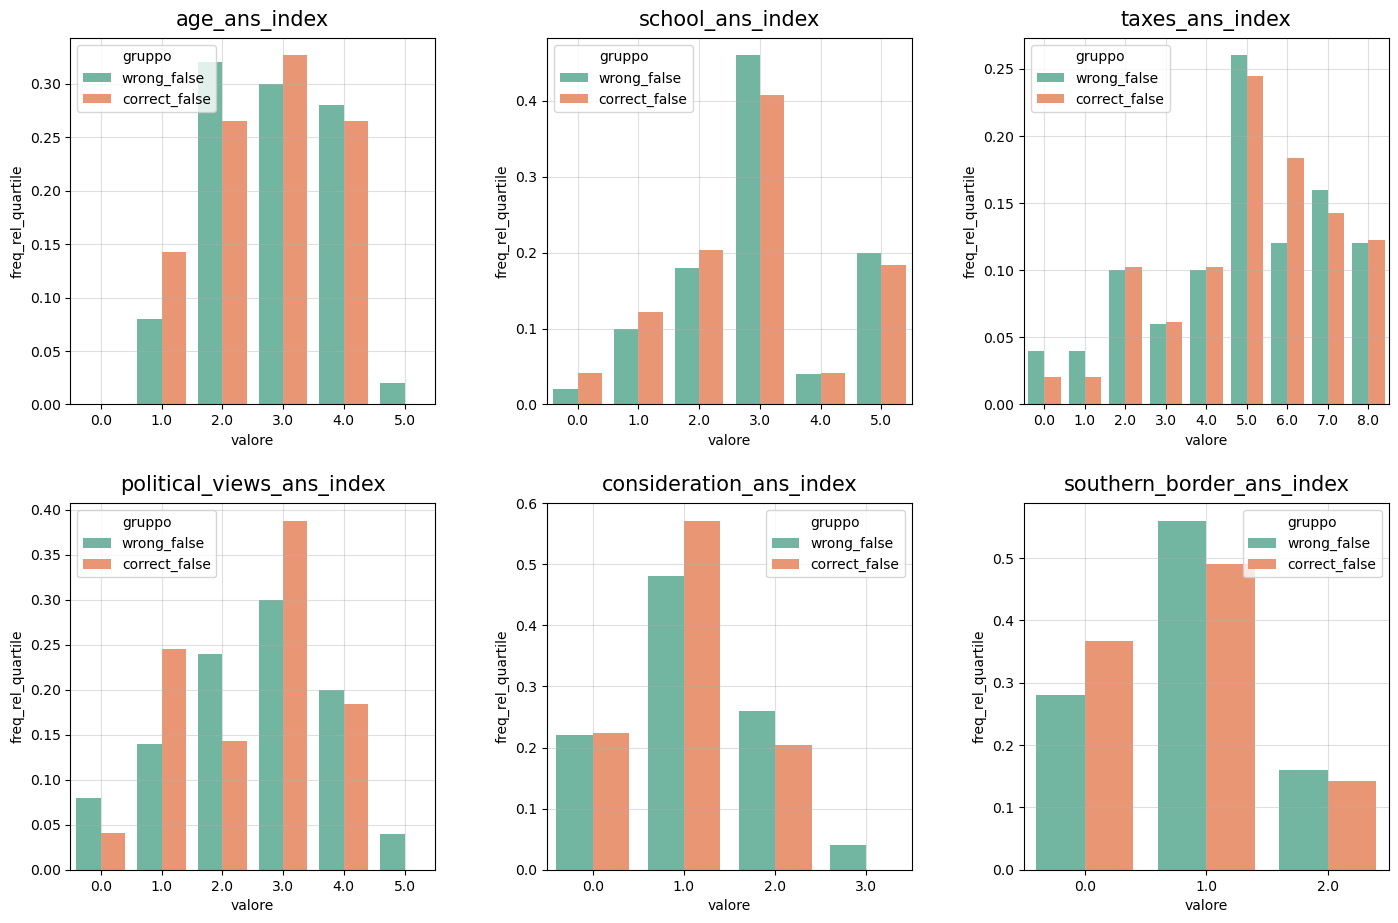

In [ ]:
gruppo = ["wrong_false", "correct_false"]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label=True)

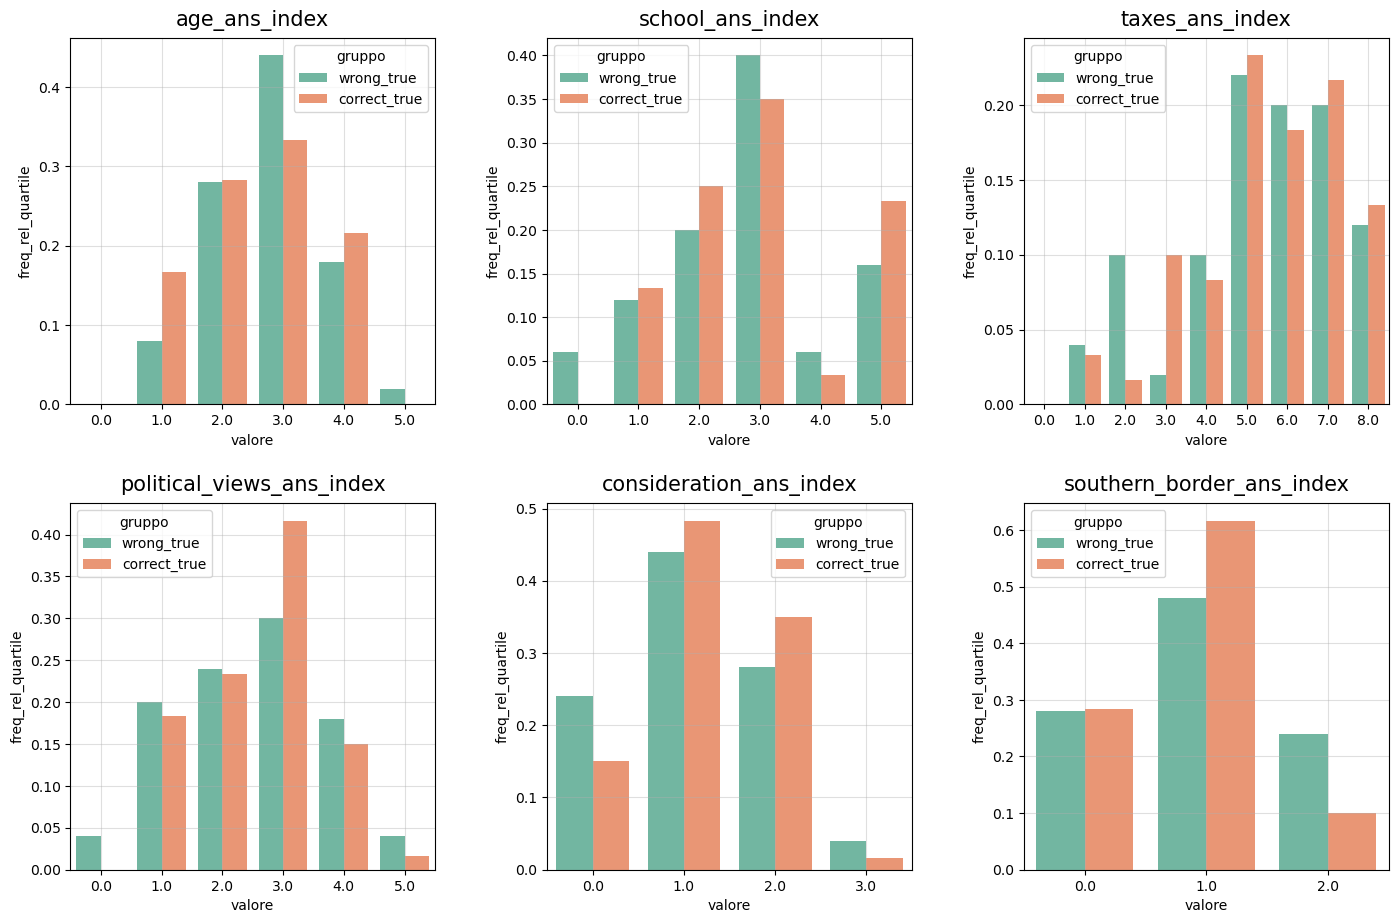

In [ ]:
gruppo = ["wrong_true", "correct_true"]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label=True)

raggruppo i quartili in gruppi per vedere se c'è una significativa presenza/assenza di valori in questi gruppi:
- gruppo 1 => wrong vs correct


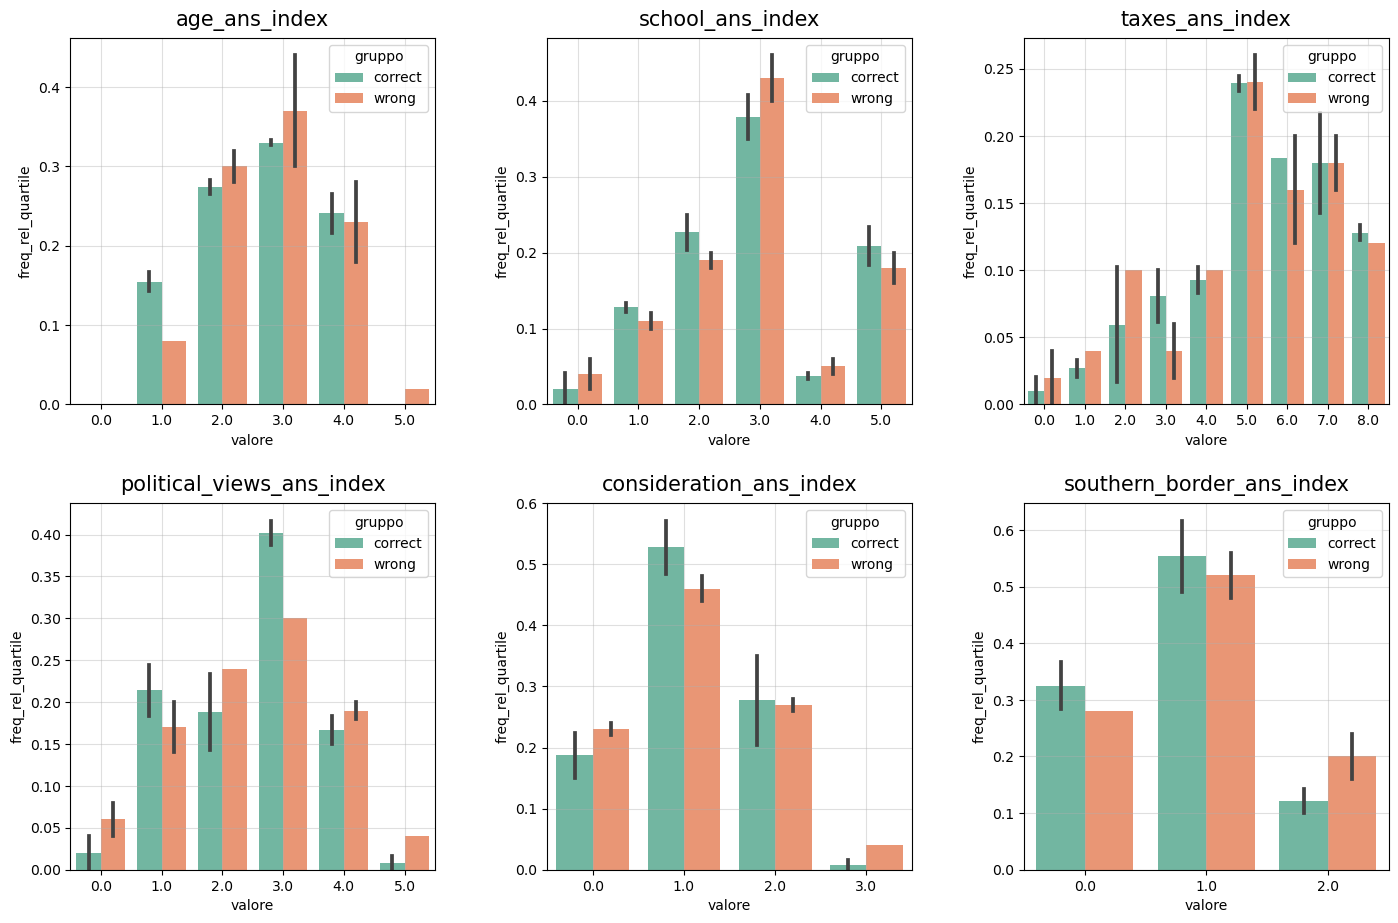

In [ ]:
gruppo = [["correct_false", "correct_true"],["wrong_false", "wrong_true"]]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label = True,names = ["correct","wrong"])

In [ ]:
gruppi_quartili = [["correct_false", "correct_true"],["wrong_false", "wrong_true"]]
name_gruppi = ["correct","wrong"]
calcola_p_value_gruppi_quartili(raccoglitore_dimensioni, dimensioni_da_analizzare, gruppi_quartili,label = True, name_gruppi = name_gruppi, solo_significativi = True)

- gruppo 2 => true vs false

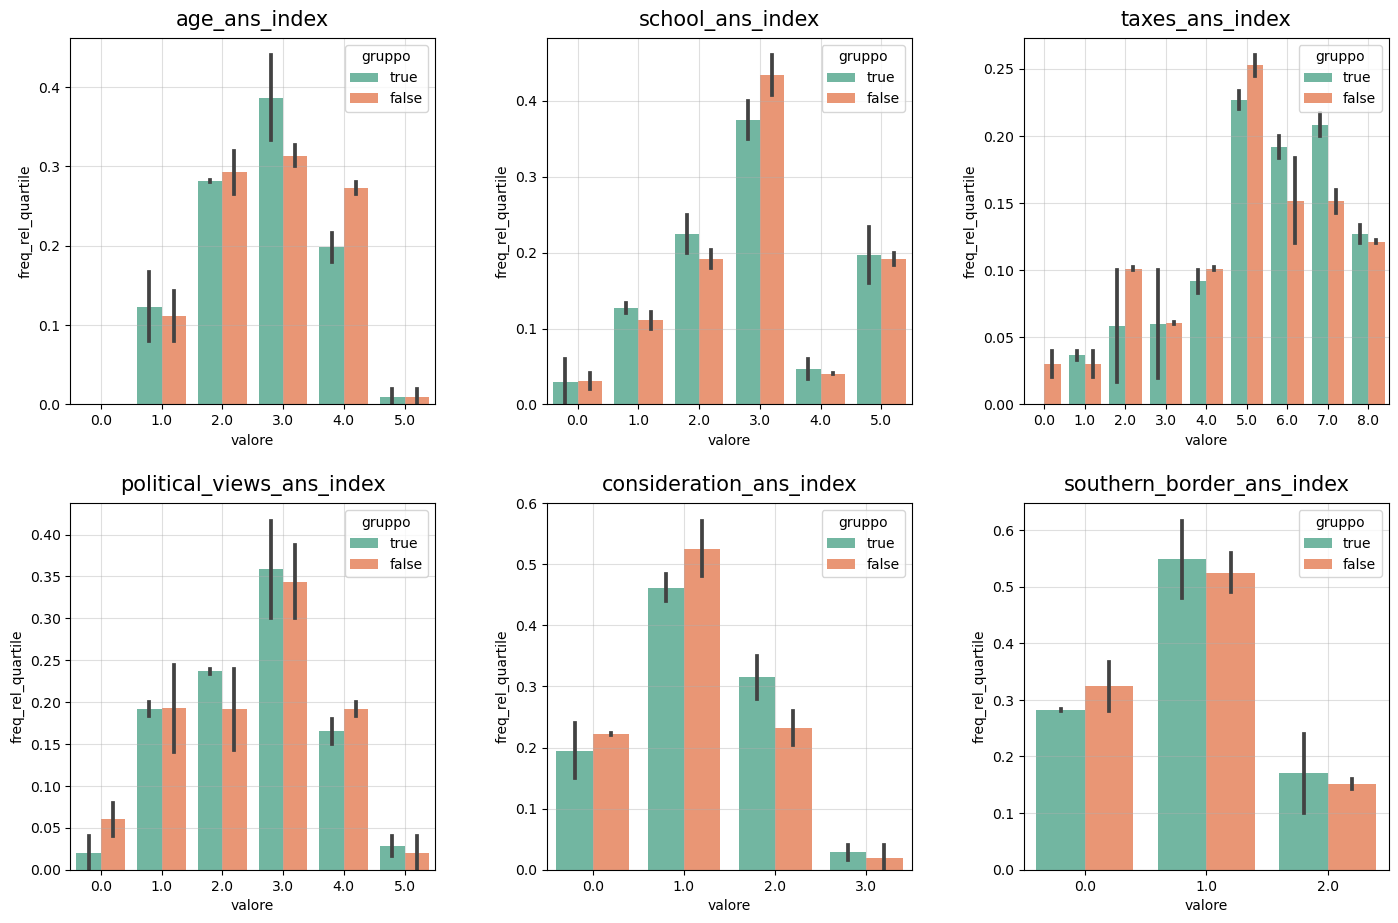

In [ ]:
gruppo = [["wrong_true", "correct_true"],["wrong_false", "correct_false"]]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label = True,names = ["true","false"])

In [ ]:
gruppi_quartili = [["correct_true", "wrong_true"],["wrong_false", "correct_false"]]
name_gruppi = ["true","false"]
calcola_p_value_gruppi_quartili(raccoglitore_dimensioni, dimensioni_da_analizzare, gruppi_quartili,label = True, name_gruppi = name_gruppi, solo_significativi = True)

# Regressione

In [ ]:
dimensioni_da_analizzare_per_regressione_1 = ["age_ans_index", "school_ans_index", "taxes_ans_index", "political_views_ans_index", "consideration_ans_index", "southern_border_ans_index"]

In [ ]:
sub = df_for_Q1[df_for_Q1["sovra"] != "other"]

for dimensione in dimensioni_da_analizzare_per_regressione_1:
    sub[dimensione[:-10]+"_mean"] = 0

for statement in sub["doc_id"].unique():
    #sovra = sub[sub["doc_id"] == statement]["sovra"].unique()[0]  
    for dim in dimensioni_da_analizzare_per_regressione_1:
        mean = np.asarray(sub[sub["doc_id"] == statement][dim],dtype = np.float64).mean()
        df_for_Q1.loc[df_for_Q1["doc_id"] == statement, dim[:-10]+"_mean"] = mean 

In [ ]:
df_for_Q1.columns

Index(['worker_id', 'doc_id', 'doc_fact_check_ground_truth_label',
       'doc_fact_check_ground_truth_value', 'sovra', 'quartile',
       'doc_truthfulness_value', 'mean', 'scarto', 'doc_truthfulness_index',
       'age_ans_index', 'age_ans_label', 'school_ans_index',
       'school_ans_label', 'taxes_ans_index', 'taxes_ans_label',
       'political_views_ans_index', 'political_views_ans_label',
       'consideration_ans_index', 'consideration_ans_label',
       'southern_border_ans_index', 'southern_border_ans_label',
       's_info_1_ans_index', 's_info_1_ans_label', 's_info_3_v2_ans_index',
       's_info_3_v2_ans_label', 's_info_4_ans_index', 's_info_4_ans_label',
       's_info_5_ans_index', 's_info_5_ans_label', 's_info_6_ans_index',
       's_info_6_ans_label', 's_info_7_ans_index', 's_info_7_ans_label',
       's_com_1_v2_ans_index', 's_com_1_v2_ans_label', 's_com_2_ans_index',
       's_com_2_ans_label', 'k_info_1_ans_index', 'k_info_1_ans_label',
       'k_info_2_ans_index',

In [ ]:
df_for_Q1_drop = df_for_Q1.drop_duplicates(subset=["doc_id", "sovra"])

In [ ]:
df_all, df_false, df_true , df_wrong, df_correct, df_wrong_false, df_correct_false, df_correct_true, df_wrong_true, DF_no_quartili, DF = crea_df_per_analisi(df_for_Q1_drop)

In [ ]:
for variabile_interesse in ["mean"]:
    for df in DF_no_quartili:
        results = ols(
            f'''
                {variabile_interesse} ~ age_mean + school_mean + taxes_mean + political_views_mean + consideration_mean + southern_border_mean"""
            '''
            , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > 0.14:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ age_mean + school_mean + taxes_mean + political_views_mean + consideration_mean + southern_border_mean in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > 2:
                print(index)
                tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                        groups=df[1][index[2:-1]], 
                                        alpha=0.05)
                
                df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))

----------------------------------------------------------------------------------------------------
mean ~ age_mean + school_mean + taxes_mean + political_views_mean + consideration_mean + southern_border_mean in df_wrong


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
school_mean,0.068341,1.0,0.068341,2.211057,0.233737,0.301163,0.145181
consideration_mean,0.024921,1.0,0.024921,0.806277,0.435396,0.109821,-0.023223
age_mean,0.013763,1.0,0.013763,0.445296,0.552319,0.060653,-0.066498
taxes_mean,0.012571,1.0,0.012571,0.406717,0.568983,0.055398,-0.071122
southern_border_mean,0.011068,1.0,0.011068,0.358092,0.591735,0.048775,-0.076951
political_views_mean,0.003532,1.0,0.003532,0.114286,0.757592,0.015567,-0.106179
Residual,0.092726,3.0,0.030909,NaN,NaN,NaN,NaN


----------------------------------------------------------------------------------------------------
mean ~ age_mean + school_mean + taxes_mean + political_views_mean + consideration_mean + southern_border_mean in df_correct


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
political_views_mean,6.871157,1.0,6.871157,5.482631,0.079248,0.276331,0.215089
consideration_mean,6.302493,1.0,6.302493,5.028883,0.088375,0.253462,0.193317
age_mean,6.007128,1.0,6.007128,4.793206,0.093761,0.241583,0.182009
southern_border_mean,0.317150,1.0,0.317150,0.253060,0.641365,0.012755,-0.035840
school_mean,0.312281,1.0,0.312281,0.249175,0.643862,0.012559,-0.036027
taxes_mean,0.042401,1.0,0.042401,0.033833,0.863011,0.001705,-0.046359
Residual,5.013036,4.0,1.253259,NaN,NaN,NaN,NaN


In [ ]:
for variabile_interesse in ["correct_true", "wrong_true"]:
    for df in [["df_all",df_all], ["df_true",df_true]]:
        
        results = ols(
            f'''
                {variabile_interesse} ~ age_mean + school_mean + taxes_mean + political_views_mean + consideration_mean + southern_border_mean"""
            '''
            , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > 0.14:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ age_mean + school_mean + taxes_mean + political_views_mean + consideration_mean + southern_border_mean in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > 2:
                print(index)
                tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                        groups=df[1][index[2:-1]], 
                                        alpha=0.05)
                
                df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))

----------------------------------------------------------------------------------------------------
correct_true ~ age_mean + school_mean + taxes_mean + political_views_mean + consideration_mean + southern_border_mean in df_true


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
taxes_mean,0.835890,1.0,0.835890,4.205180,0.061025,0.208623,0.151496
southern_border_mean,0.241778,1.0,0.241778,1.216331,0.290080,0.060343,0.010225
consideration_mean,0.198829,1.0,0.198829,1.000267,0.335499,0.049624,0.000013
age_mean,0.141398,1.0,0.141398,0.711341,0.414249,0.035290,-0.013644
political_views_mean,0.004425,1.0,0.004425,0.022261,0.883684,0.001104,-0.046214
school_mean,0.000297,1.0,0.000297,0.001495,0.969744,0.000074,-0.047195
Residual,2.584090,13.0,0.198776,NaN,NaN,NaN,NaN


In [ ]:
for variabile_interesse in ["correct_false", "wrong_false"]:
    for df in [["df_all",df_all], ["df_false",df_false]]:
        
        results = ols(
            f'''
                {variabile_interesse} ~ age_mean + school_mean + taxes_mean + political_views_mean + consideration_mean + southern_border_mean"""
            '''
            , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > 0.14:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ age_mean + school_mean + taxes_mean + political_views_mean + consideration_mean + southern_border_mean in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > 2:
                print(index)
                tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                        groups=df[1][index[2:-1]], 
                                        alpha=0.05)
                
                df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))
        
        

age_ans_index


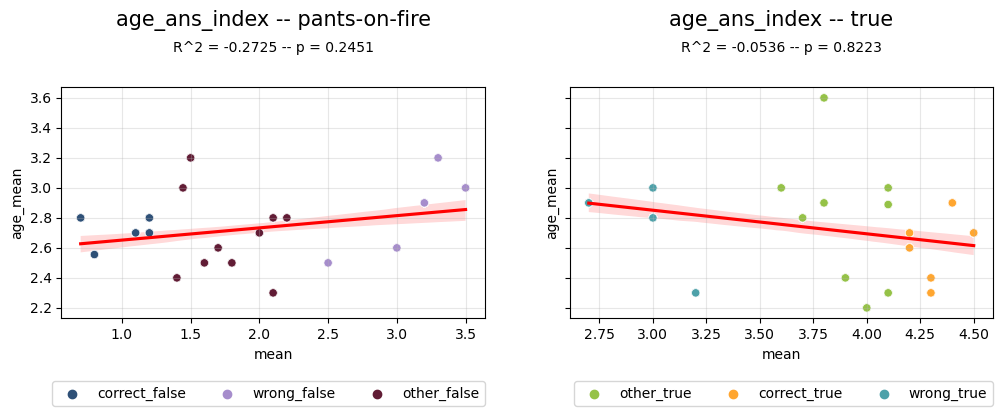

school_ans_index


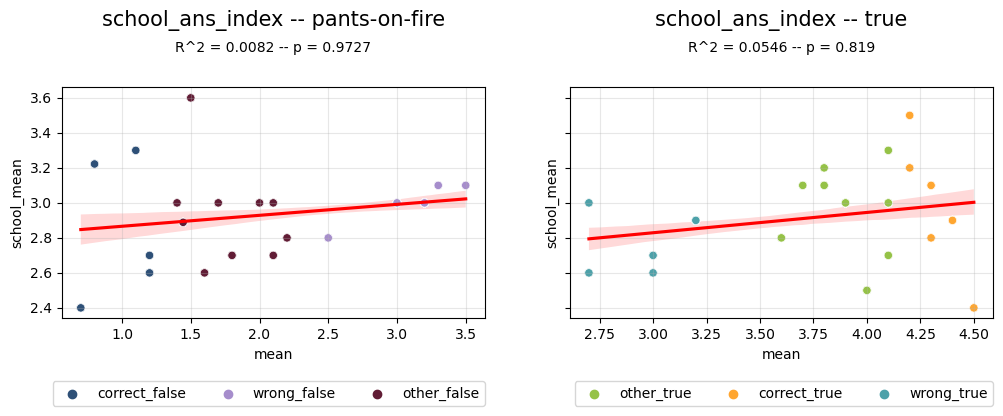

taxes_ans_index


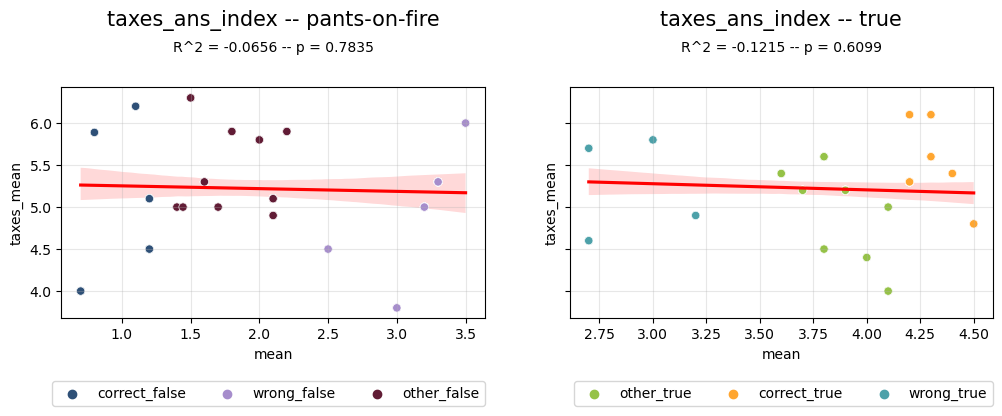

political_views_ans_index


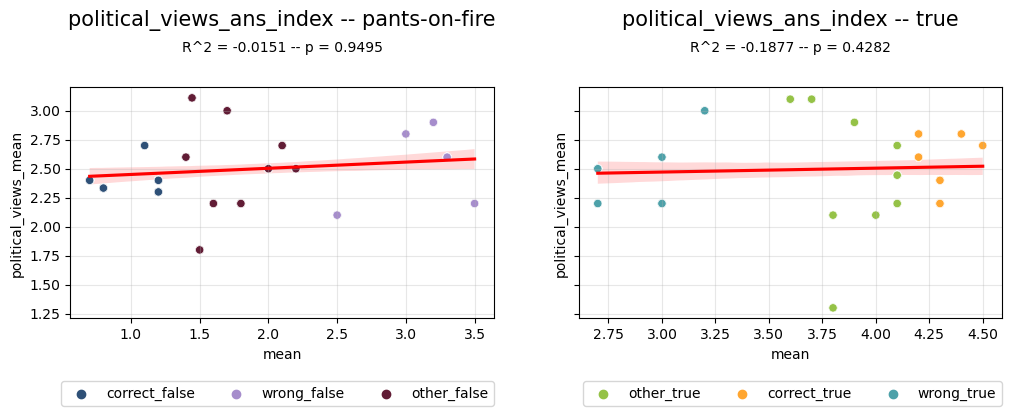

consideration_ans_index


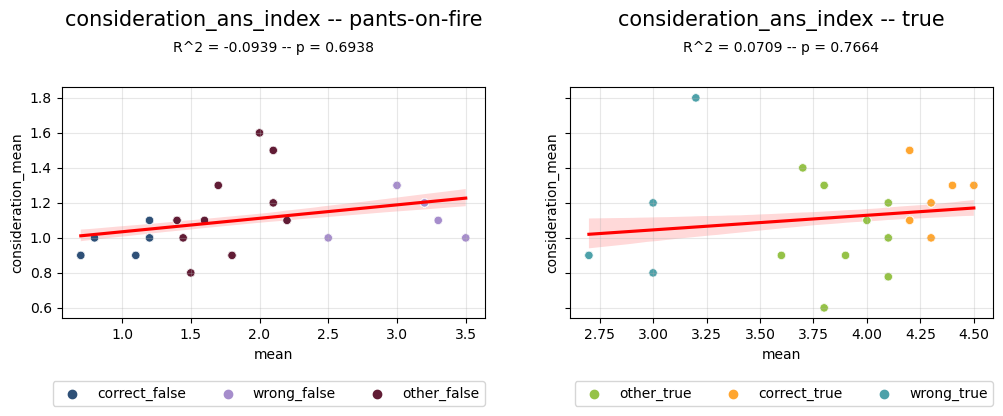

southern_border_ans_index


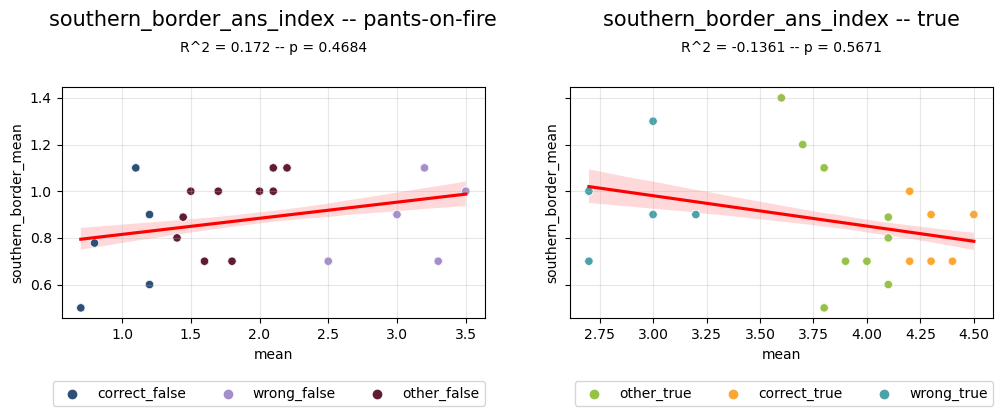

In [ ]:
plot_regressione_lineare_RQ(df_for_Q1,dimensioni_da_analizzare_per_regressione_1,10)

## Analisi scarto medio

In [ ]:
df_for_Q1 = calcola_scarto(df_for_Q1)

In [96]:
analizza_scarto(df_for_Q1,quartili,dimensioni_da_analizzare)

quartile vs all =>  age_ans_index wrong_true -> 8.513366082512972e-10
quartile vs all =>  taxes_ans_index correct_false -> 8.054364815871583e-06


    ### secondo gruppo di domande

In [97]:
# definisco le dimensioni da analizzare
dimensioni_da_analizzare = ["s_info_1_ans_index",
                            "s_info_3_v2_ans_index",
                            "s_info_4_ans_index",
                            "s_info_5_ans_index",
                            "s_info_6_ans_index",
                            "s_info_7_ans_index",
                            "s_com_1_v2_ans_index",
                            "s_com_2_ans_index"]

## Rapporto tra frequenze relative

In [98]:
raccoglitore_dimensioni = crea_raccoglitore_dimensioni(df_for_Q1, dimensioni_da_analizzare, quartili, mapping)

In [99]:
tabella_p_value = costruisci_tabella_pvalue(raccoglitore_dimensioni, dimensioni_da_analizzare, quartili)
significativi = filtra_siglificativi(tabella_p_value, dimensioni_da_analizzare, quartili, 0.05,"pvalue_quartile_sovra")
significativi

,dimensione,quartile,confronto,valore_pvalue,p_trend
2,s_com_1_v2_ans_index,correct_false,pvalue_quartile_sovra,0.015227,0.691814
1,s_info_4_ans_index,wrong_false,pvalue_quartile_sovra,0.016965,0.542059


In [100]:
# for dimensione in dimensioni_da_analizzare:
#     crea_barplot_quartili(raccoglitore_dimensioni, dimensione)

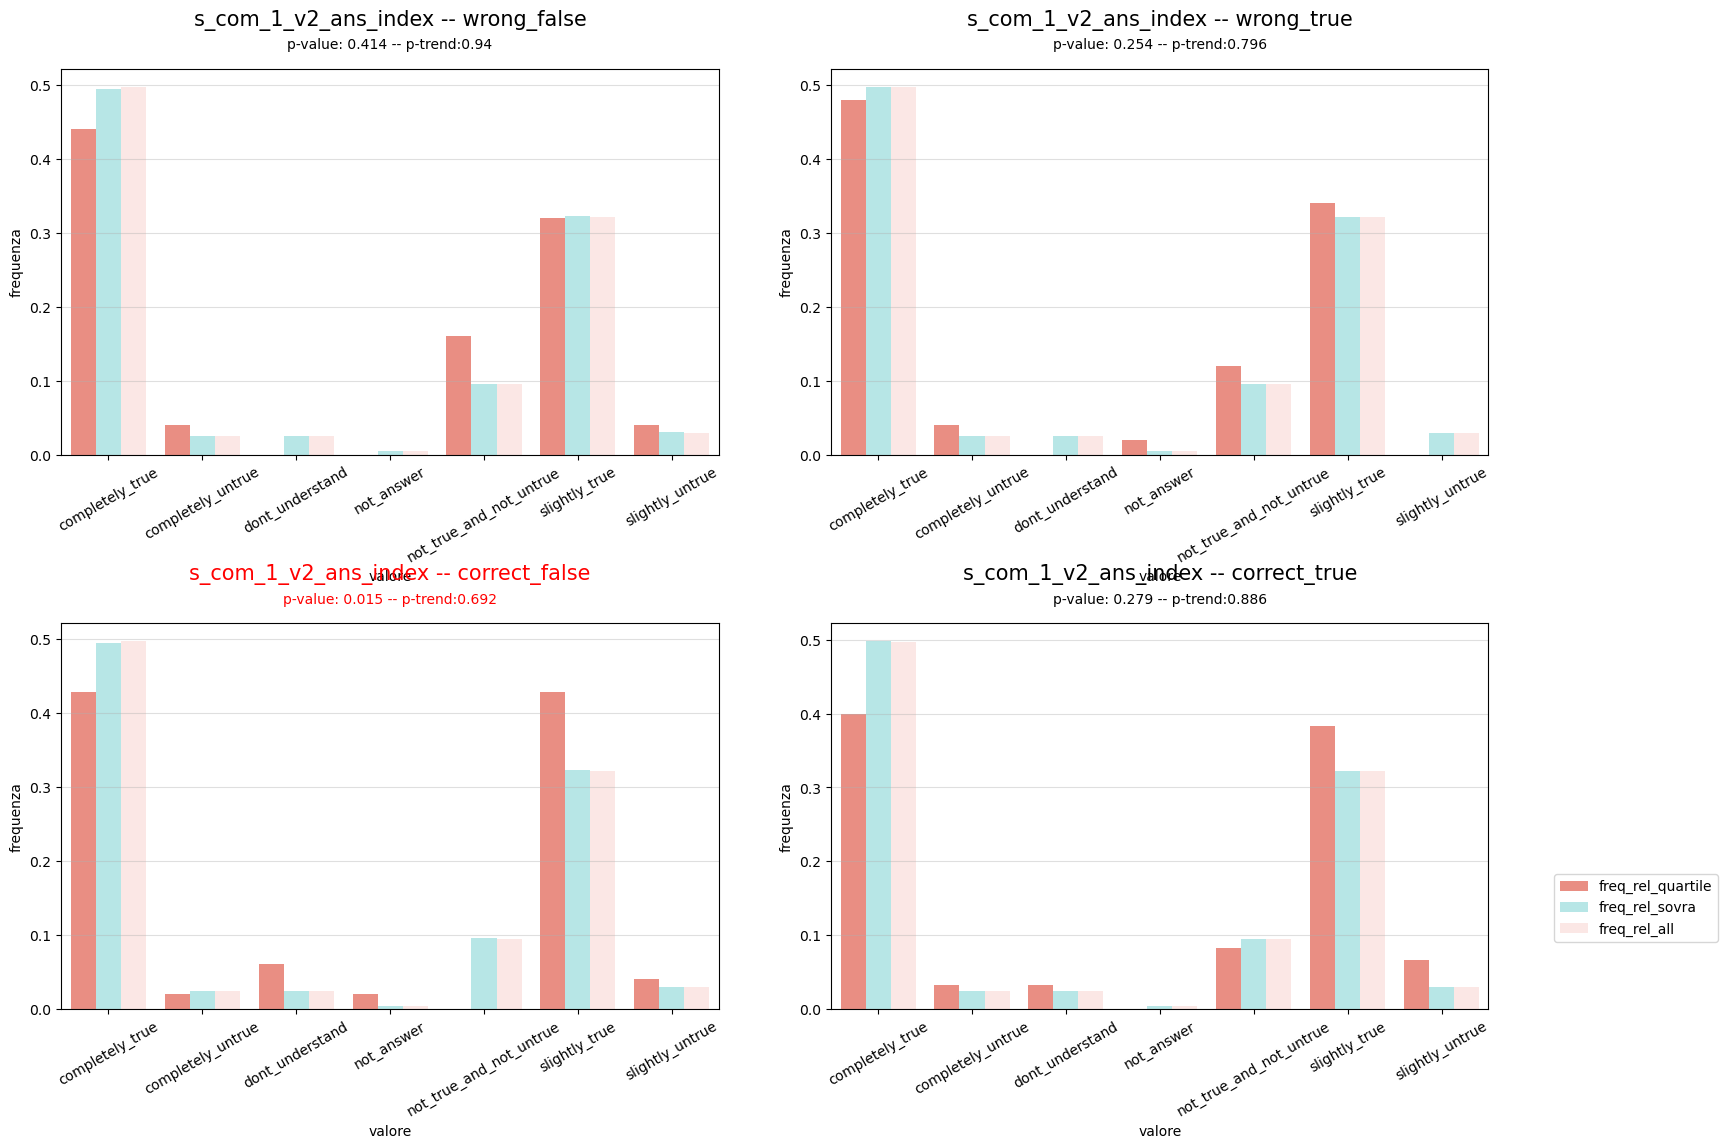

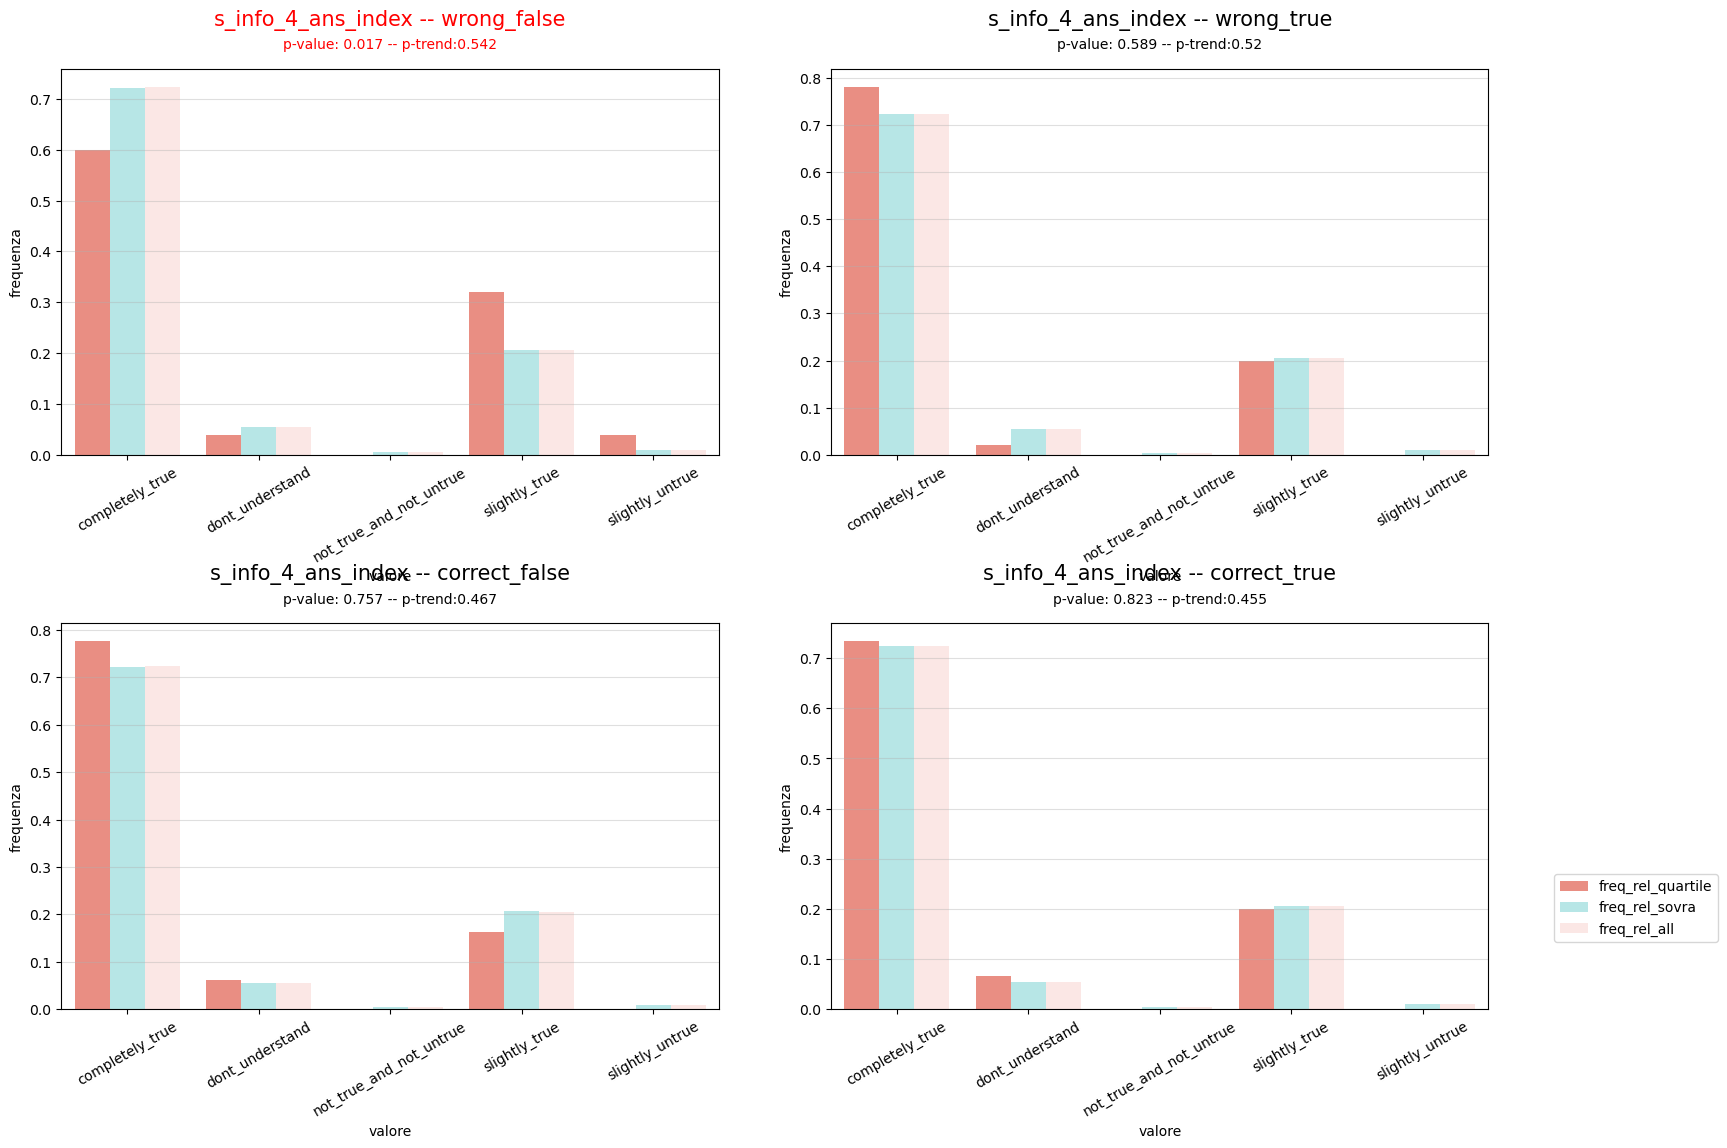

In [101]:
for dimensione in significativi["dimensione"].unique():
    crea_barplot_all(raccoglitore_dimensioni,tabella_p_value, dimensione,"label")

## confronto gruppi

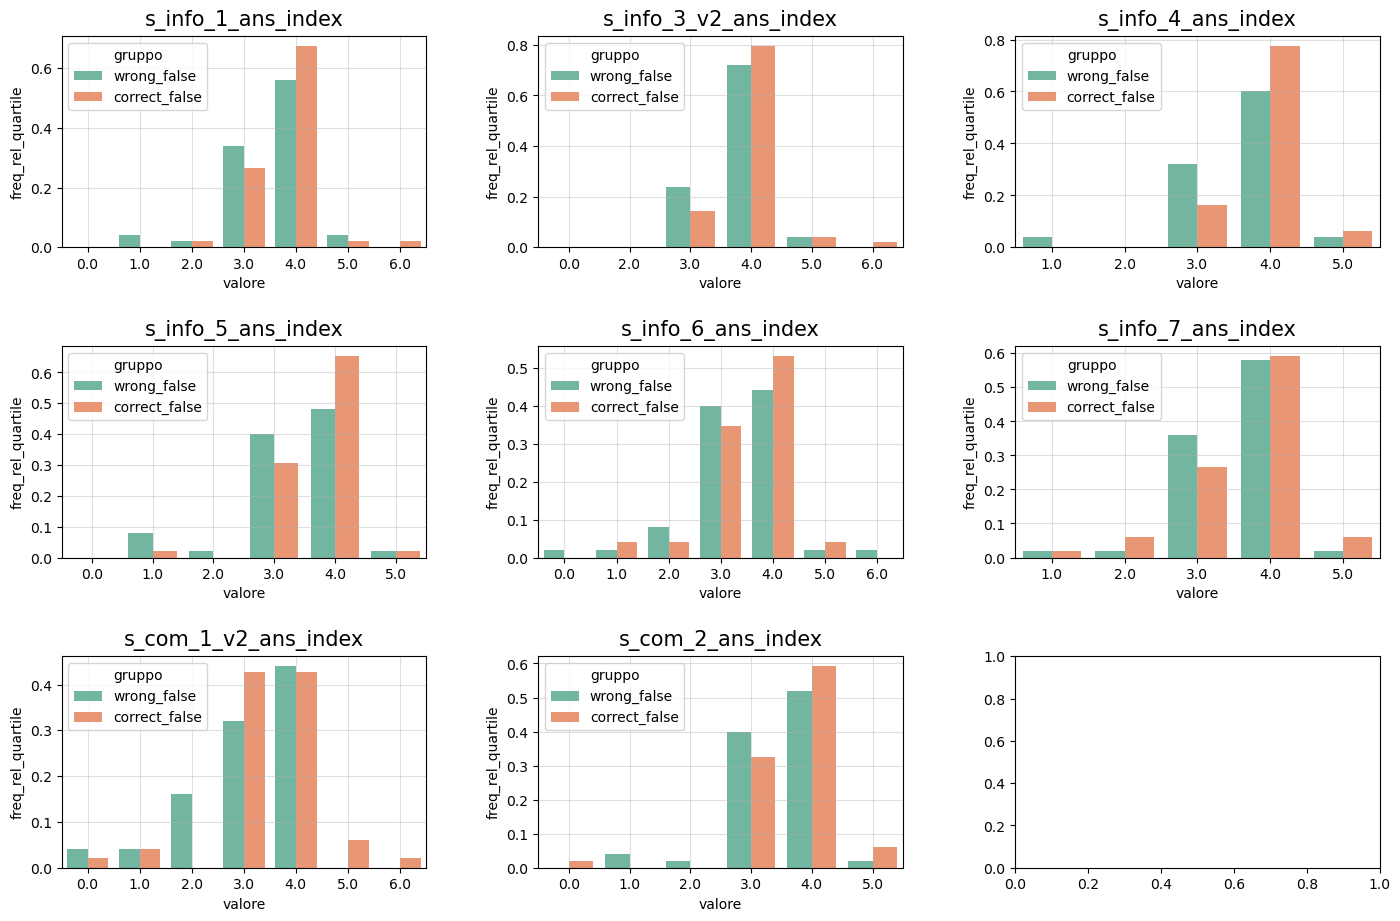

In [102]:
gruppo = ["wrong_false", "correct_false"]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label=True)

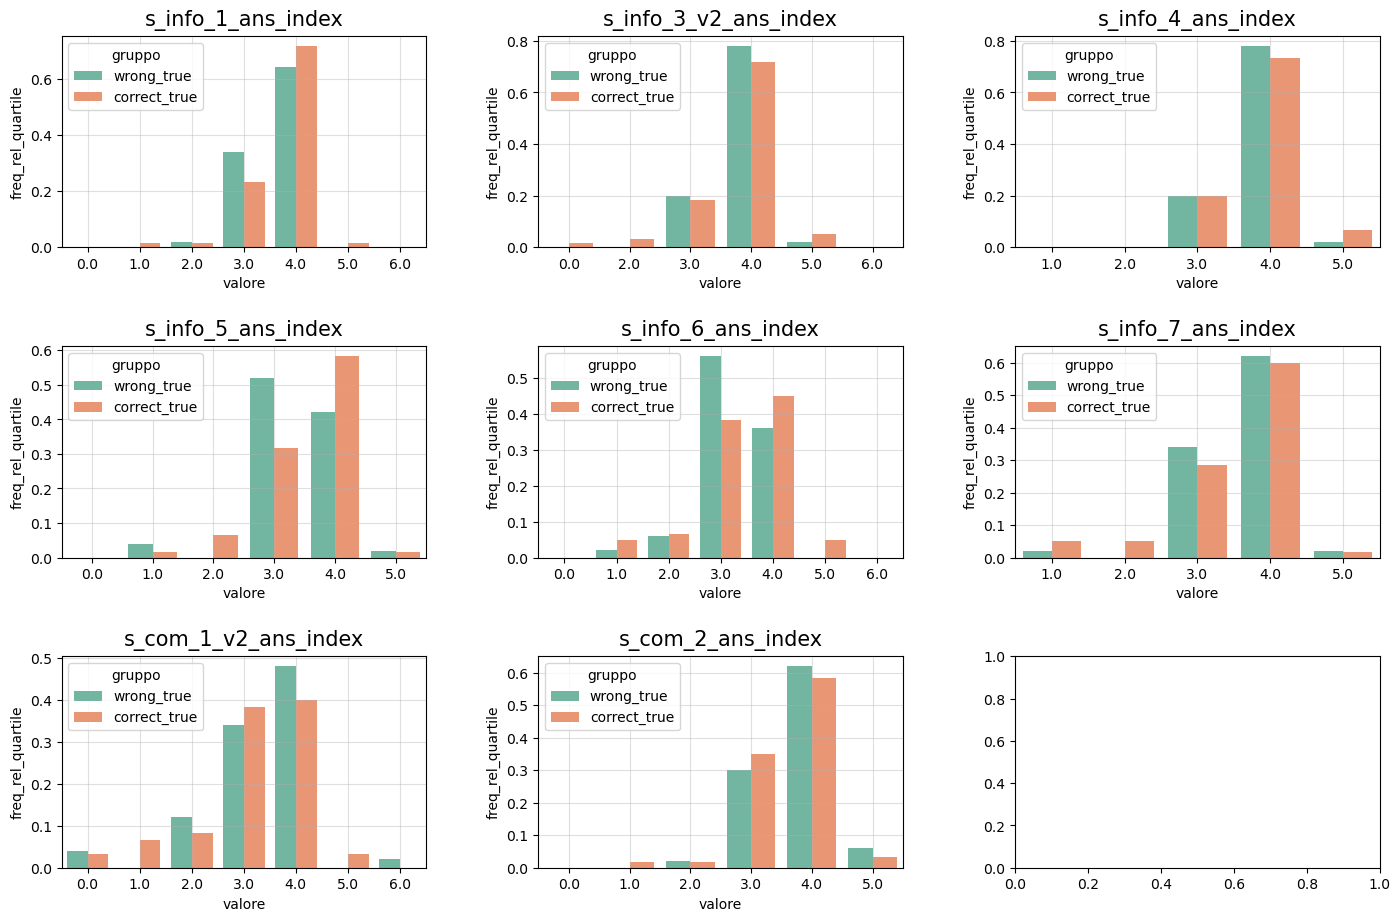

In [103]:
gruppo = ["wrong_true", "correct_true"]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label=True)

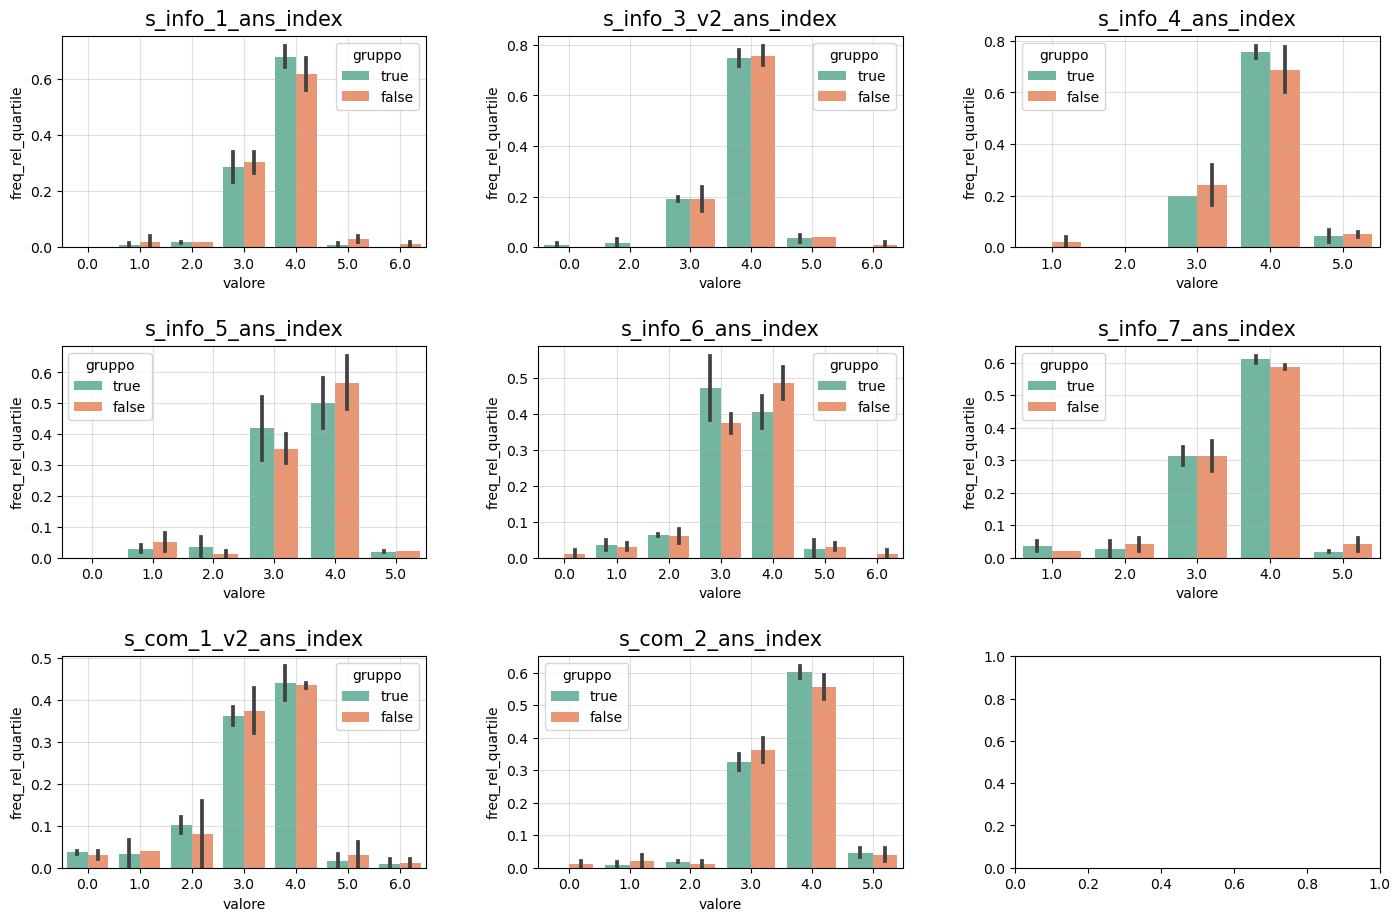

In [104]:
gruppo = [["wrong_true", "correct_true"],["wrong_false", "correct_false"]]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label = True,names = ["true","false"])

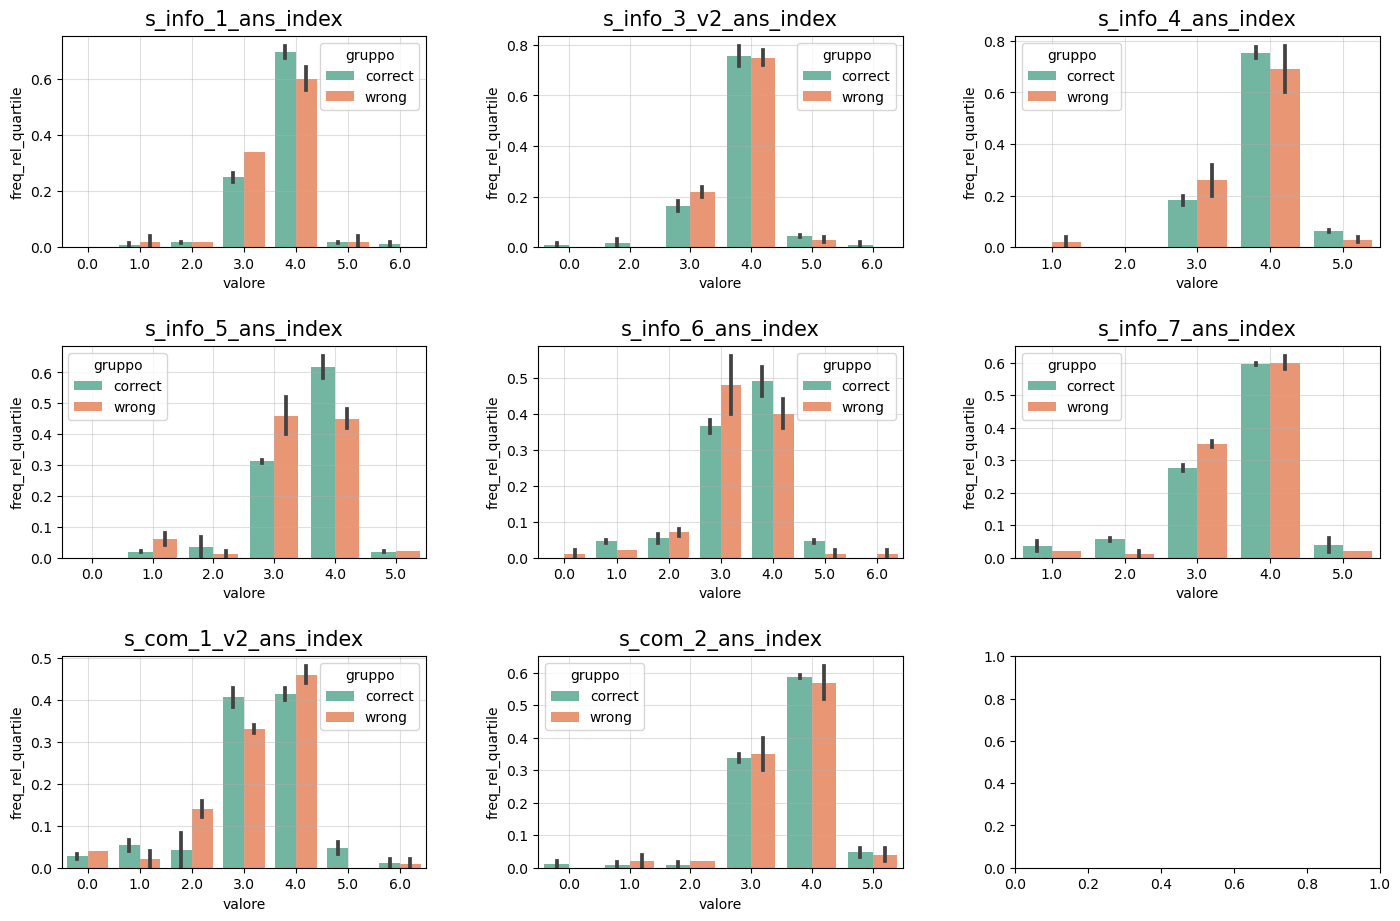

In [105]:
gruppo = [["correct_false", "correct_true"],["wrong_false", "wrong_true"]]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label = True,names = ["correct","wrong"])

raggruppo i quartili in gruppi per vedere se c'è una significativa presenza/assenza di valori in questi gruppi:
- gruppo 1 => wrong vs correct


In [106]:
gruppi_quartili = [["correct_false", "correct_true"],["wrong_false", "wrong_true"]]
name_gruppi = ["correct","wrong"]
calcola_p_value_gruppi_quartili(raccoglitore_dimensioni, dimensioni_da_analizzare, gruppi_quartili,label = True, name_gruppi = name_gruppi, solo_significativi = True)

- gruppo 2 => true vs false

In [107]:
gruppi_quartili = [["correct_true", "wrong_true"],["wrong_false", "correct_false"]]
name_gruppi = ["true","false"]
calcola_p_value_gruppi_quartili(raccoglitore_dimensioni, dimensioni_da_analizzare, gruppi_quartili,label = True, name_gruppi = name_gruppi, solo_significativi = True)

### Regressione

In [108]:
dimensioni_da_analizzare_per_regressione_2 = ["s_info_1_ans_index","s_info_3_v2_ans_index","s_info_4_ans_index","s_info_5_ans_index","s_info_6_ans_index",
                                             "s_info_7_ans_index","s_com_1_v2_ans_index","s_com_2_ans_index"]

s_info_1_ans_index


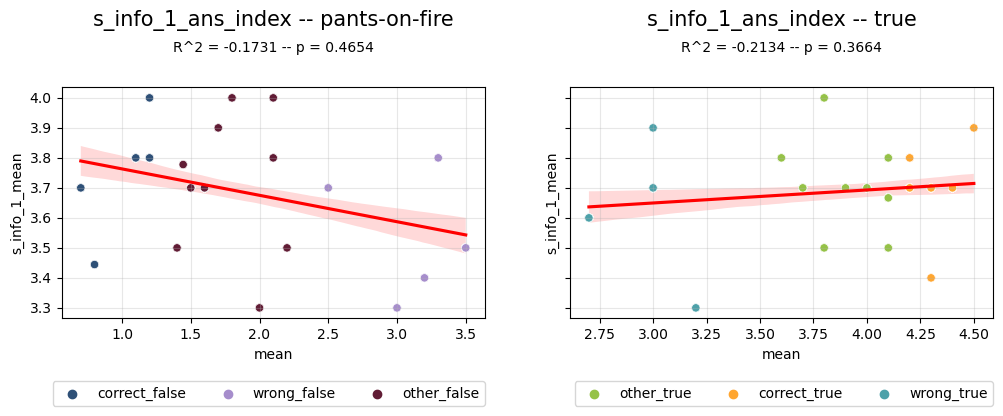

s_info_3_v2_ans_index


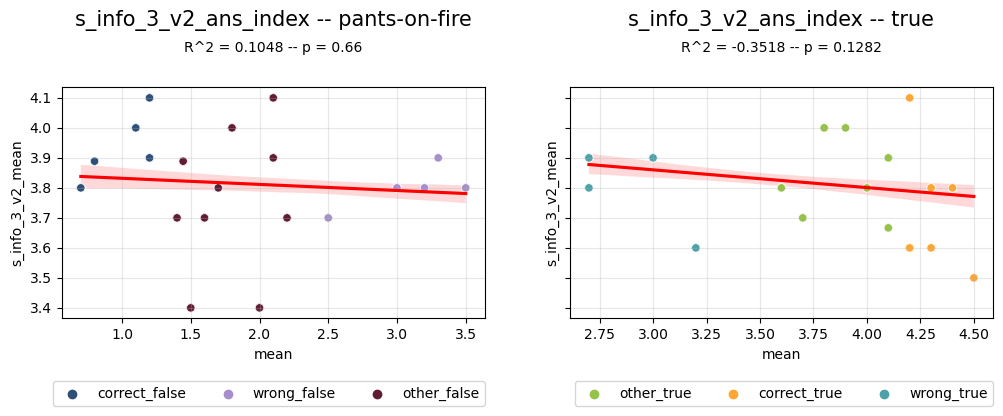

s_info_4_ans_index


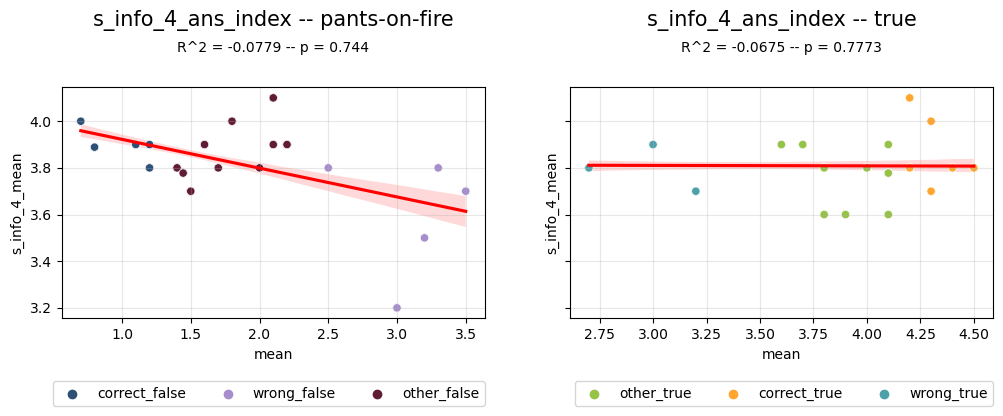

s_info_5_ans_index


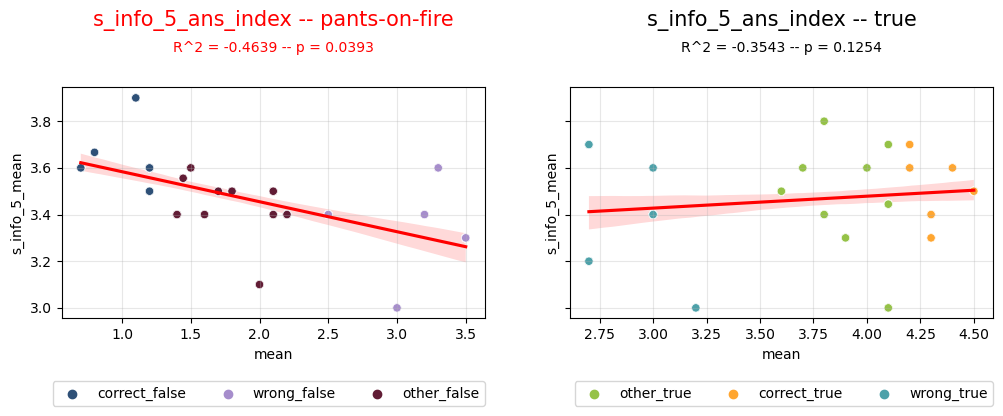

s_info_6_ans_index


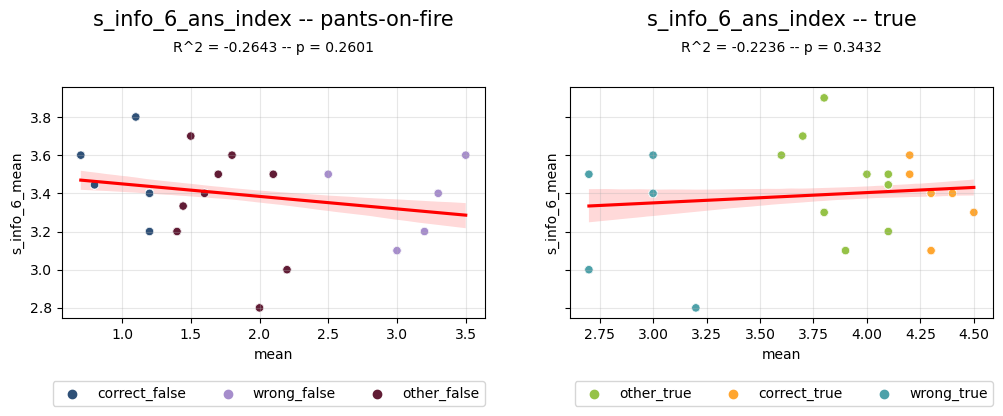

s_info_7_ans_index


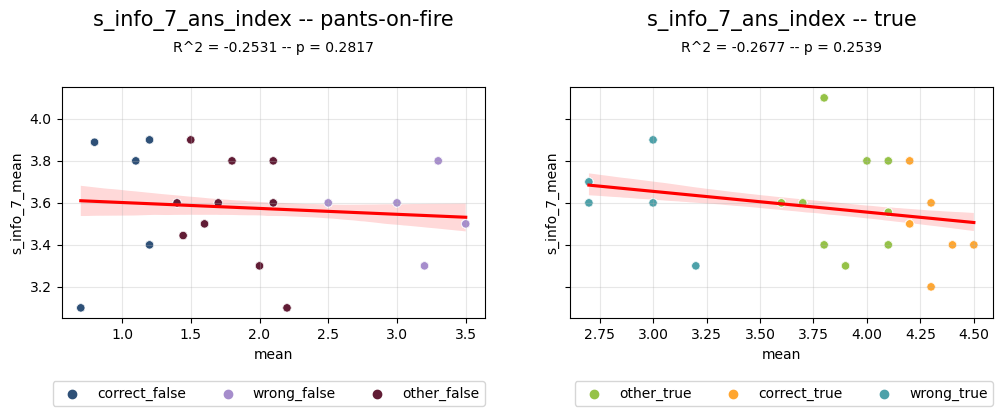

s_com_1_v2_ans_index


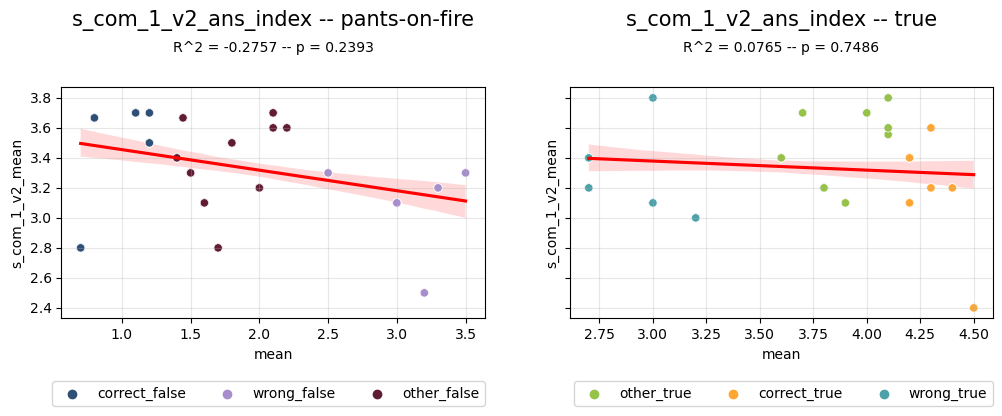

s_com_2_ans_index


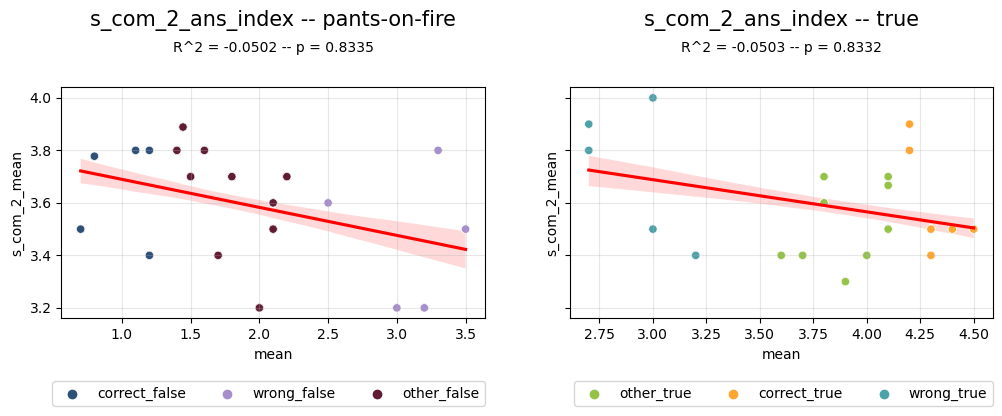

In [109]:
sub = df_for_Q1[df_for_Q1["sovra"] != "other"]

for dimensione in dimensioni_da_analizzare_per_regressione_2:
    sub[dimensione[:-10]+"_mean"] = 0

for statement in sub["doc_id"].unique():
    #sovra = sub[sub["doc_id"] == statement]["sovra"].unique()[0]  
    for dim in dimensioni_da_analizzare_per_regressione_2:
        mean = np.asarray(sub[sub["doc_id"] == statement][dim],dtype = np.float64).mean()
        df_for_Q1.loc[df_for_Q1["doc_id"] == statement, dim[:-10]+"_mean"] = mean 
        
plot_regressione_lineare_RQ(df_for_Q1,dimensioni_da_analizzare_per_regressione_2,10)

## Analisi scarto

In [110]:
analizza_scarto(df_for_Q1,quartili,dimensioni_da_analizzare, solo_quartile_vs_sovra = True)

quartile vs sovra =>  s_info_1_ans_index wrong_false -> 2.2914528679320396e-22
quartile vs sovra =>  s_info_3_v2_ans_index wrong_false -> 3.421611932963891e-05
quartile vs sovra =>  s_info_4_ans_index wrong_false -> 2.492001995013384e-08
quartile vs sovra =>  s_info_5_ans_index wrong_false -> 1.7415972495059122e-07


    ### terzo gruppo di domande

### Frequenze relative

In [111]:
# definisco le dimensioni da analizzare
dimensioni_da_analizzare = ["k_info_1_ans_index",
                            "k_info_2_ans_index",
                            "k_info_3_ans_index",
                            "k_crea_2_ans_index",
                            "k_ai_2_ans_index",
                            "k_ai_4_ans_index"]

In [112]:
raccoglitore_dimensioni = crea_raccoglitore_dimensioni(df_for_Q1, dimensioni_da_analizzare, quartili, mapping)

In [113]:
tabella_p_value = costruisci_tabella_pvalue(raccoglitore_dimensioni, dimensioni_da_analizzare, quartili)
significativi = filtra_siglificativi(tabella_p_value, dimensioni_da_analizzare, quartili, 0.05,"pvalue_quartile_sovra")
significativi

,dimensione,quartile,confronto,valore_pvalue,p_trend
3,k_ai_4_ans_index,correct_false,pvalue_quartile_sovra,0.018400,0.722156
0,k_info_1_ans_index,correct_false,pvalue_quartile_sovra,0.027682,0.283316
1,k_info_1_ans_index,correct_true,pvalue_quartile_sovra,0.030529,0.356295


In [114]:
#for dimensione in dimensioni_da_analizzare:
#    crea_barplot_quartili(raccoglitore_dimensioni, dimensione)

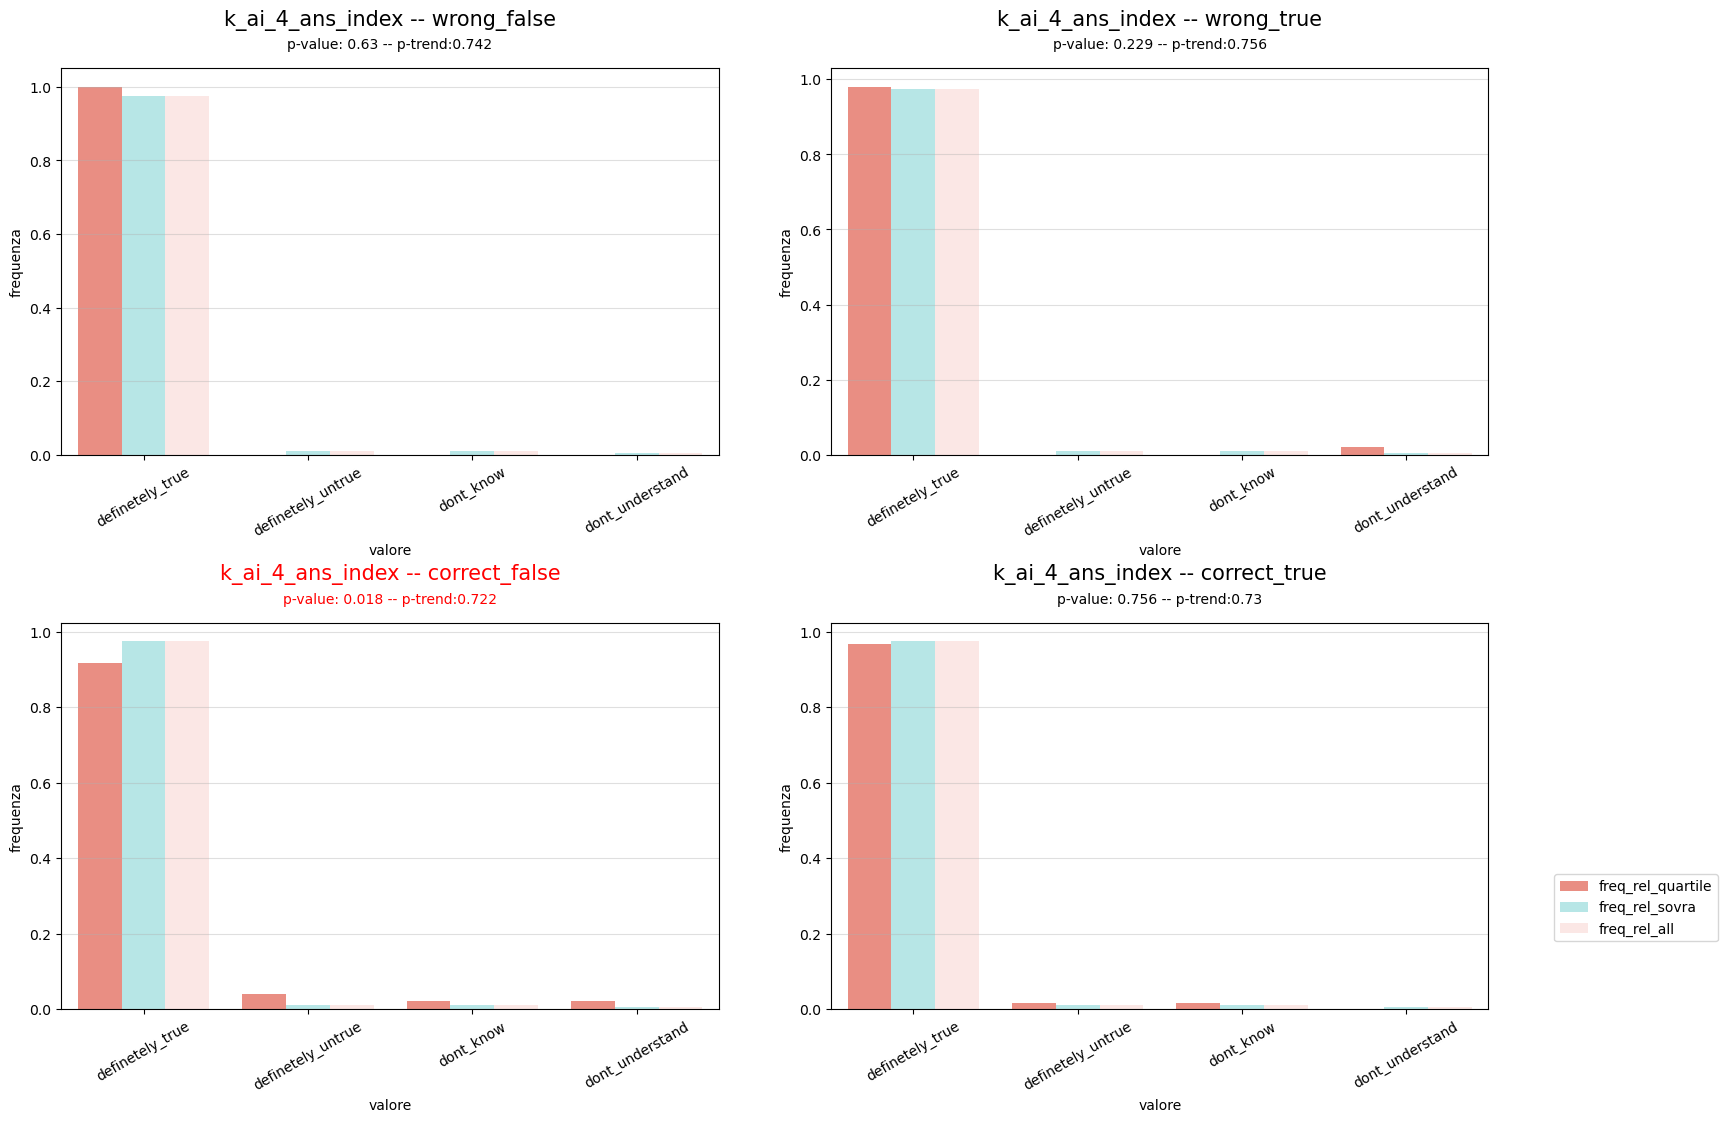

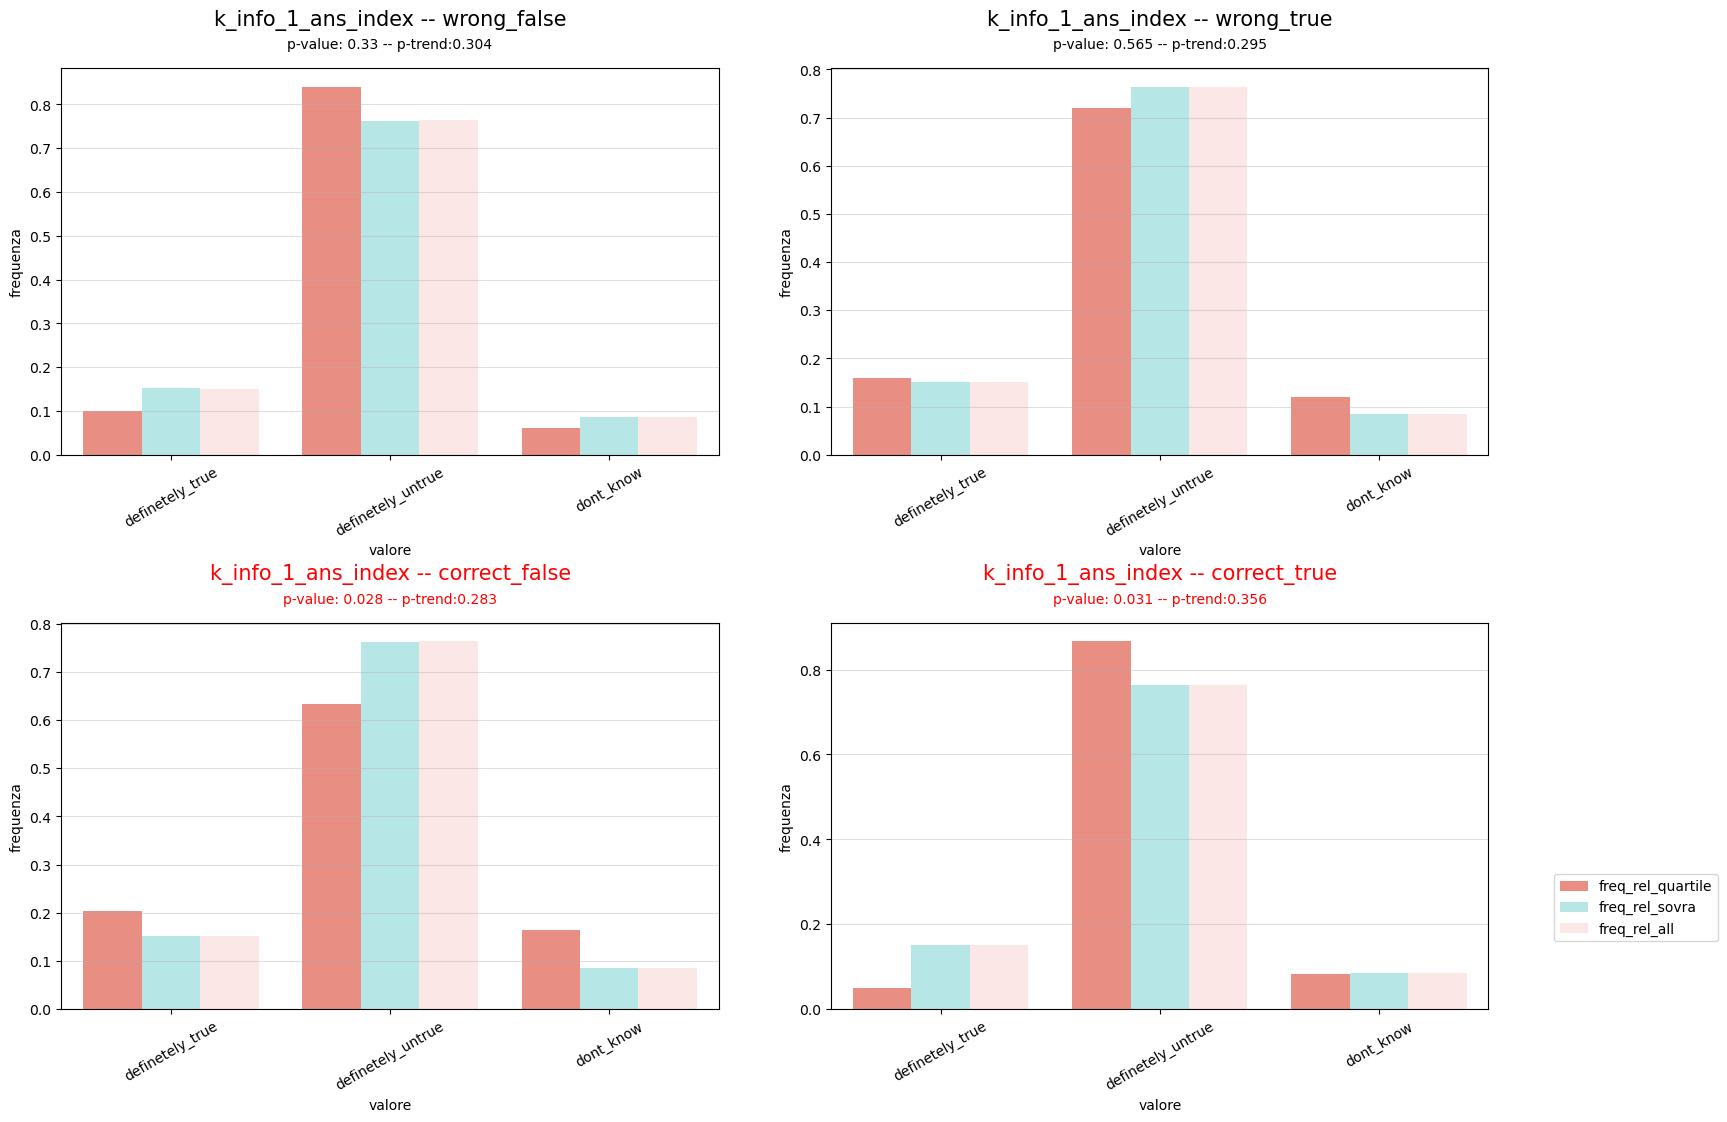

In [115]:
for dimensione in significativi["dimensione"].unique():
    crea_barplot_all(raccoglitore_dimensioni,tabella_p_value, dimensione,"label")

## confronto gruppi

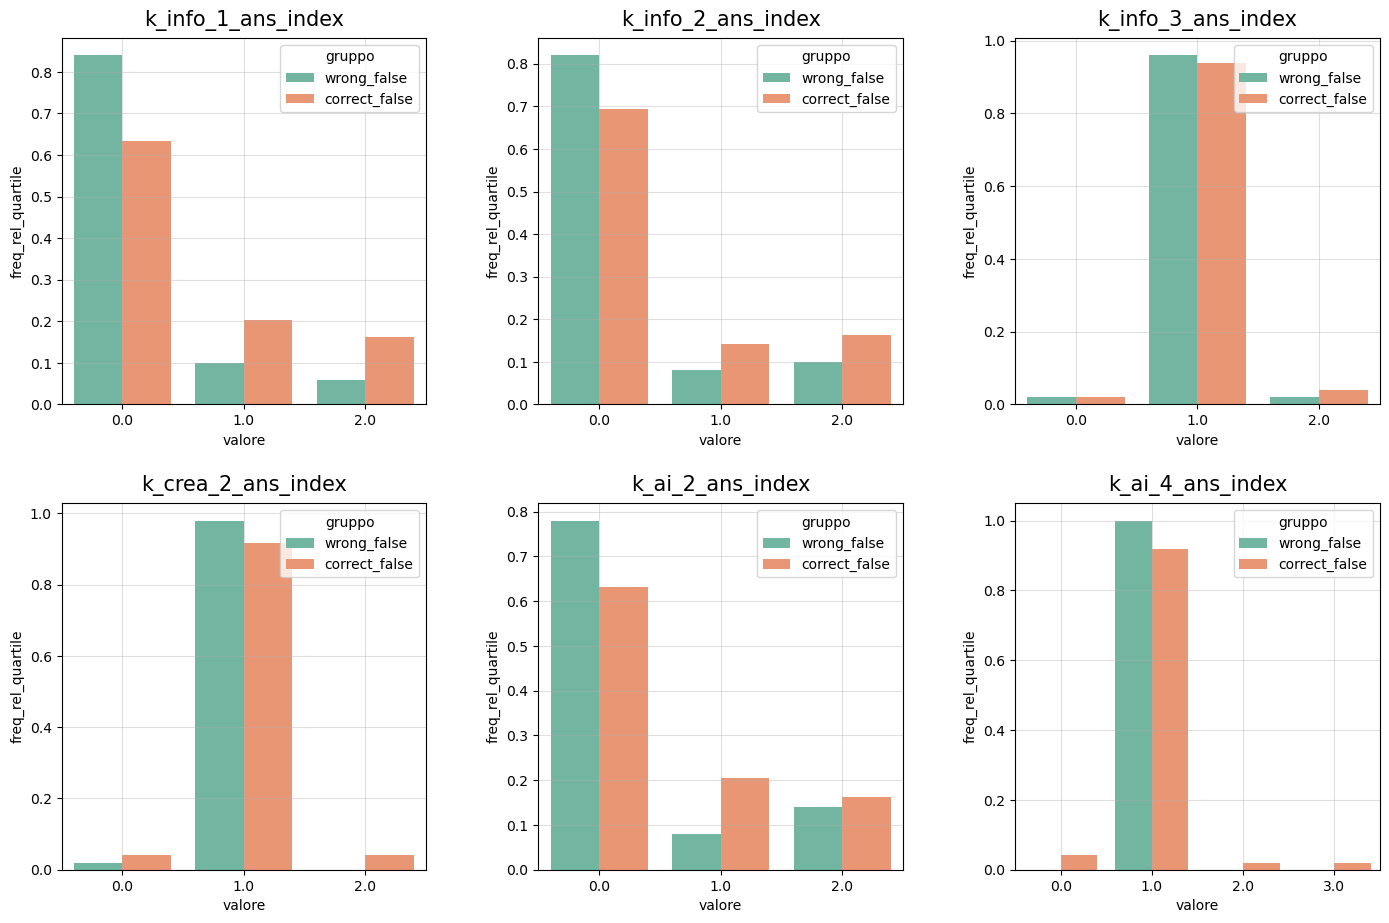

In [116]:
gruppo = ["wrong_false", "correct_false"]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label=True)

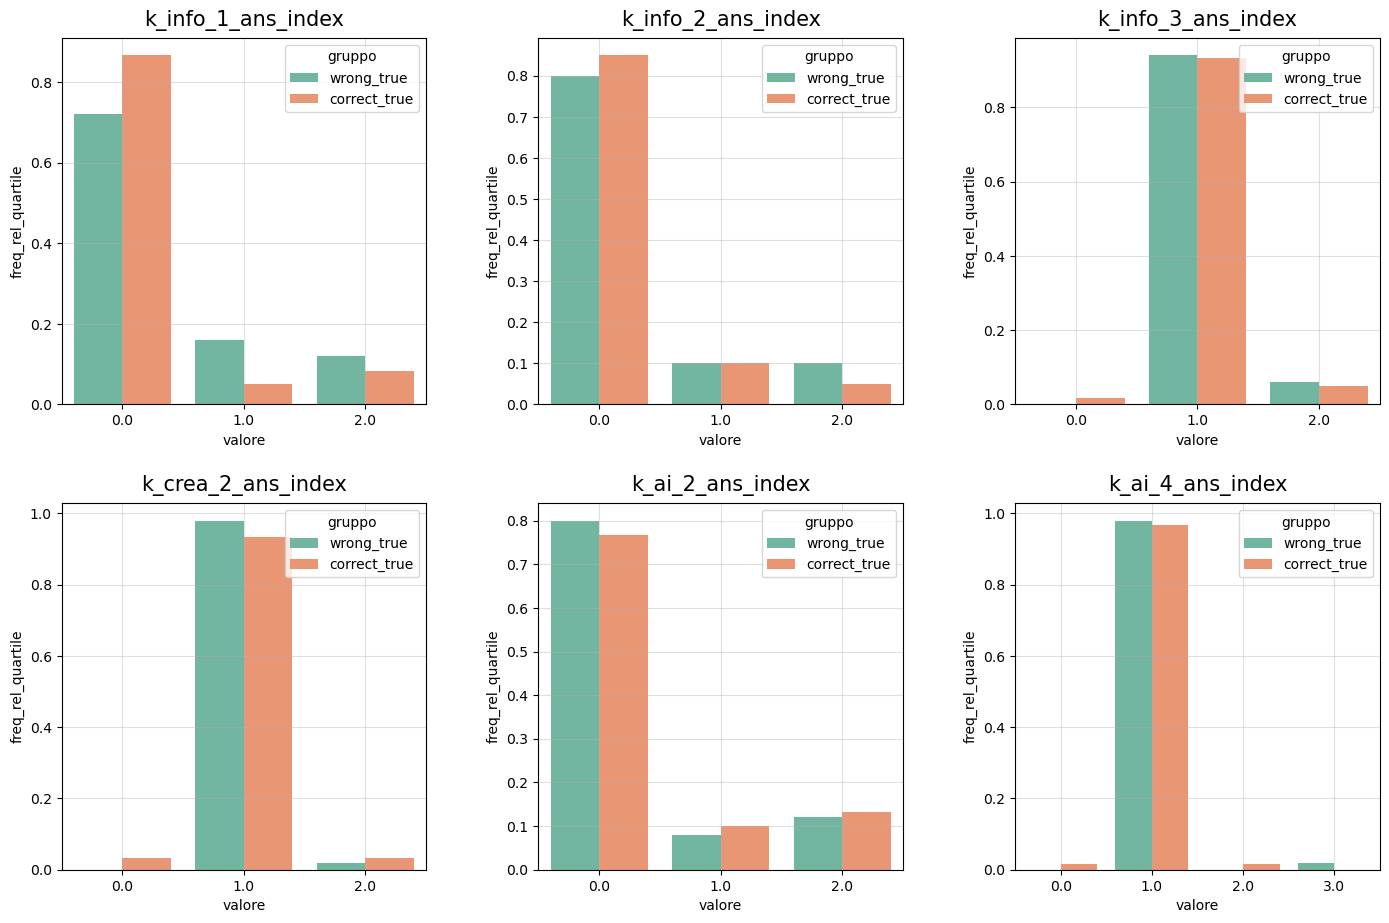

In [117]:
gruppo = ["wrong_true", "correct_true"]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label=True)

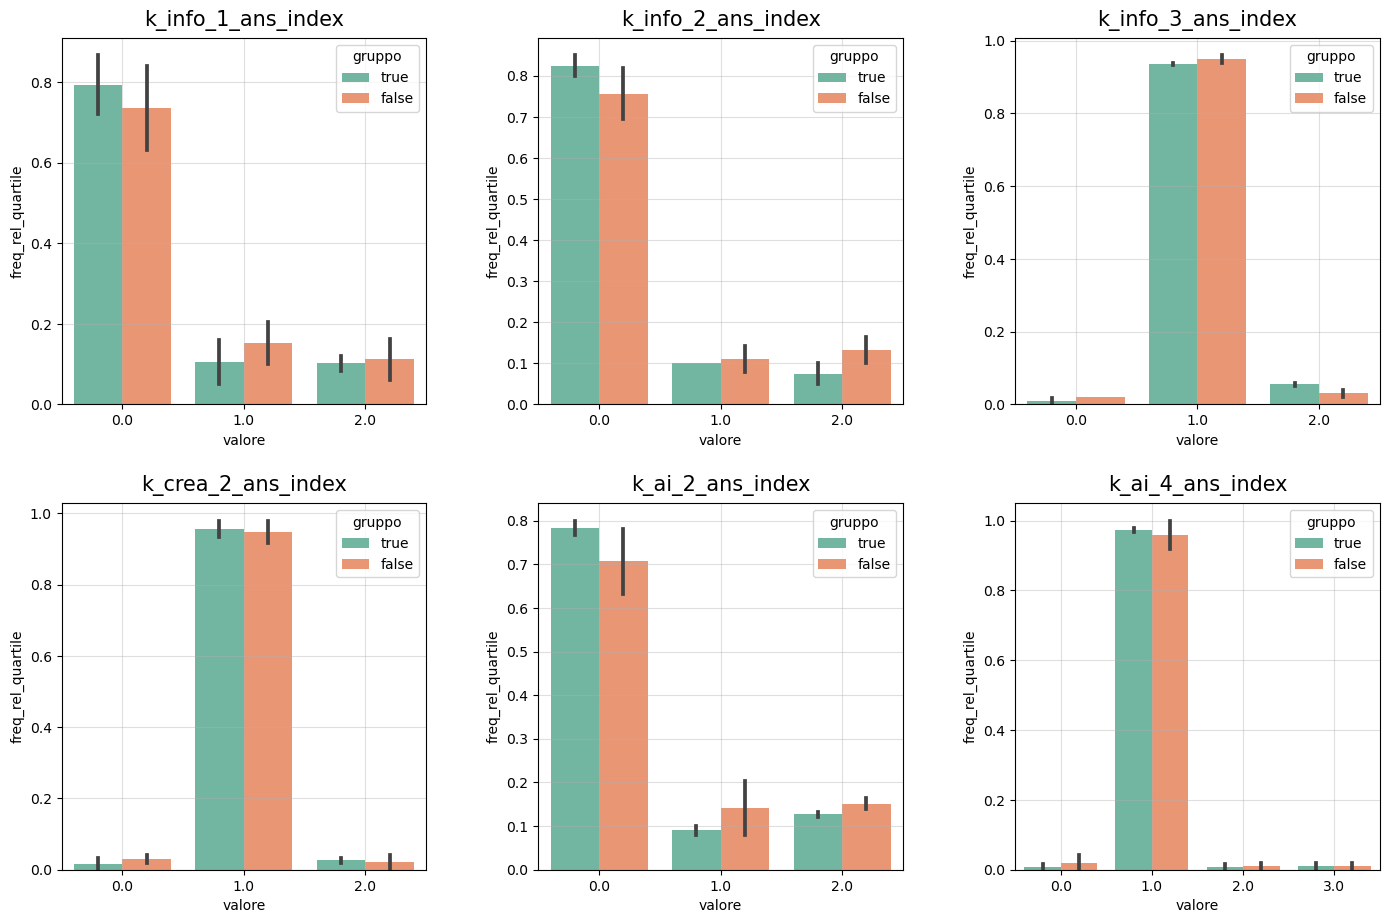

In [118]:
gruppo = [["wrong_true", "correct_true"],["wrong_false", "correct_false"]]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label = True,names = ["true","false"])

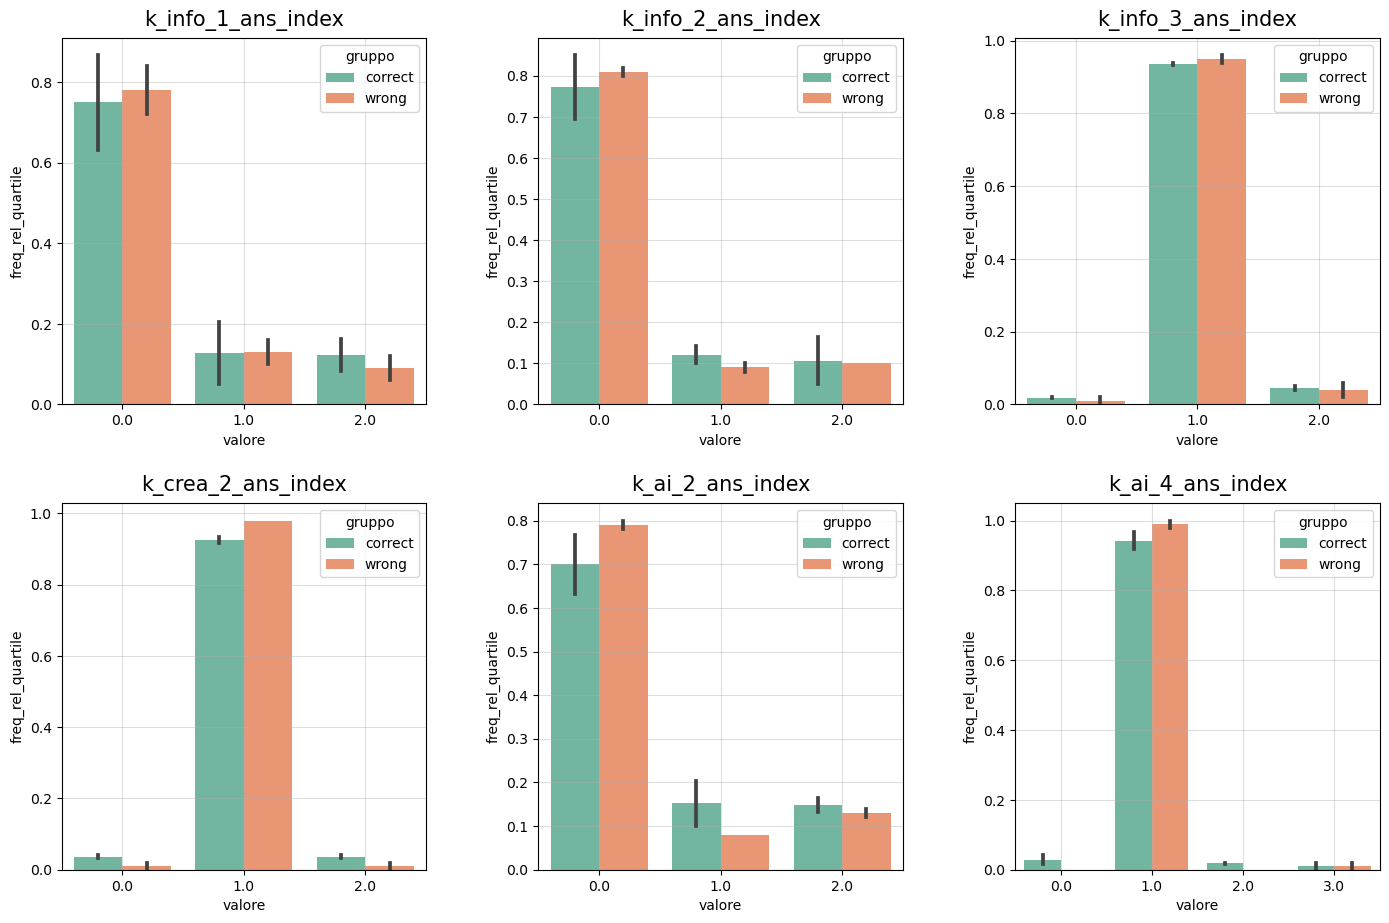

In [119]:
gruppo = [["correct_false", "correct_true"],["wrong_false", "wrong_true"]]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label = True,names = ["correct","wrong"])

raggruppo i quartili in gruppi per vedere se c'è una significativa presenza/assenza di valori in questi gruppi:
- gruppo 1 => wrong vs correct


In [120]:
gruppi_quartili = [["correct_false", "correct_true"],["wrong_false", "wrong_true"]]
name_gruppi = ["correct","wrong"]
calcola_p_value_gruppi_quartili(raccoglitore_dimensioni, dimensioni_da_analizzare, gruppi_quartili,label = True, name_gruppi = name_gruppi, solo_significativi = False)

correct k_info_1_ans_index 0.30192085225802506
wrong k_info_1_ans_index 0.8271220241780499
correct k_info_2_ans_index 0.7893559847031046
wrong k_info_2_ans_index 0.3116241498221332
correct k_info_3_ans_index 0.3924227844900223
wrong k_info_3_ans_index 0.835283417690144
correct k_crea_2_ans_index 0.06287596040982367
wrong k_crea_2_ans_index 0.6808574955099059
correct k_ai_2_ans_index 0.8412972146809965
wrong k_ai_2_ans_index 0.1794214178071097
correct k_ai_4_ans_index 0.17349988959570437
wrong k_ai_4_ans_index 0.43051194298506024


- gruppo 2 => true vs false

In [121]:
gruppi_quartili = [["correct_true", "wrong_true"],["wrong_false", "correct_false"]]
name_gruppi = ["true","false"]
calcola_p_value_gruppi_quartili(raccoglitore_dimensioni, dimensioni_da_analizzare, gruppi_quartili,label = True, name_gruppi = name_gruppi, solo_significativi = False)

true k_info_1_ans_index 0.2742952595237009
false k_info_1_ans_index 0.6293904497378444
true k_info_2_ans_index 0.2543972544772827
false k_info_2_ans_index 0.3453711011744202
true k_info_3_ans_index 0.29154519863805256
false k_info_3_ans_index 0.5722941653722812
true k_crea_2_ans_index 0.5411529034957303
false k_crea_2_ans_index 0.6804217658850895
true k_ai_2_ans_index 0.26856406227051893
false k_ai_2_ans_index 0.8092264835031684
true k_ai_4_ans_index 0.9359598519092702
false k_ai_4_ans_index 0.6408935812685803


### Regressione

In [122]:
dimensioni_da_analizzare_per_regressione_3 = ["k_info_1_ans_index","k_info_2_ans_index","k_info_3_ans_index","k_crea_2_ans_index","k_ai_2_ans_index",
                                             "k_ai_4_ans_index"]

k_info_1_ans_index


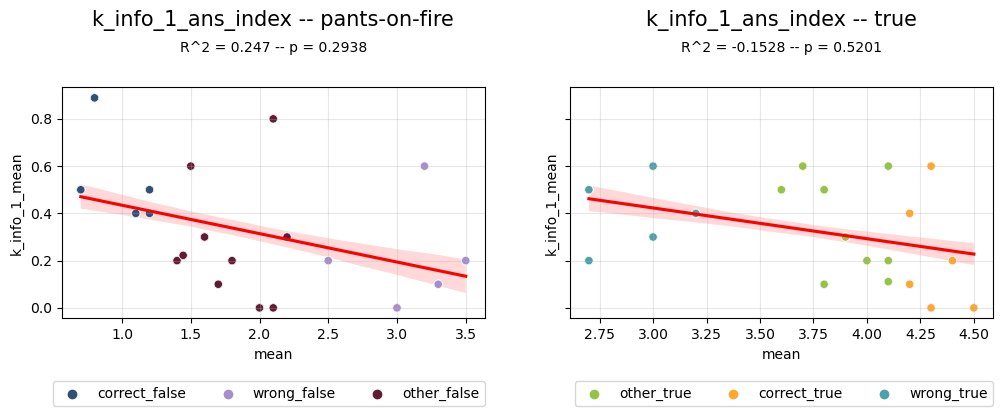

k_info_2_ans_index


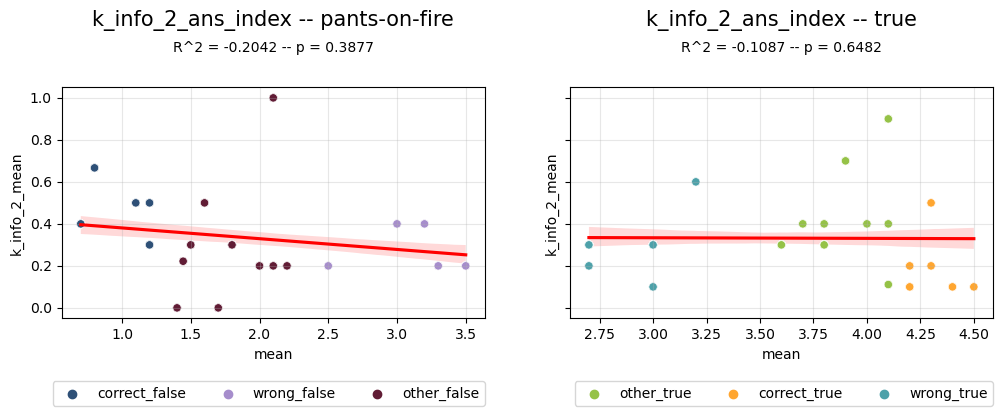

k_info_3_ans_index


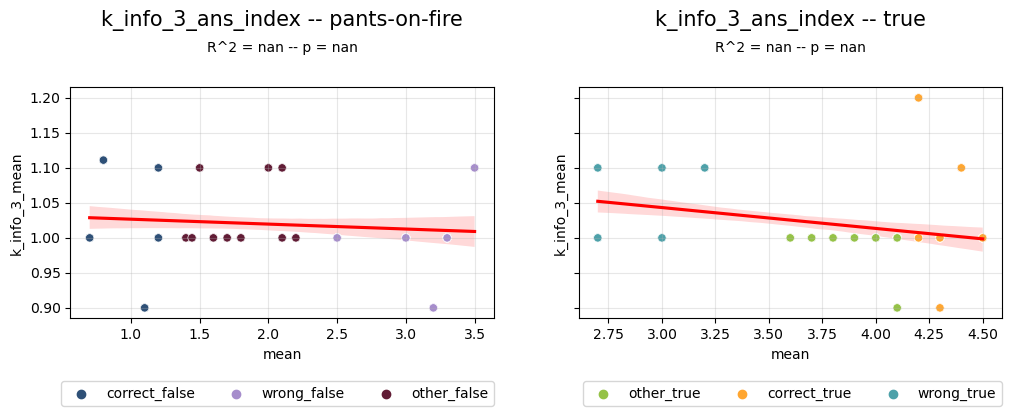

k_crea_2_ans_index


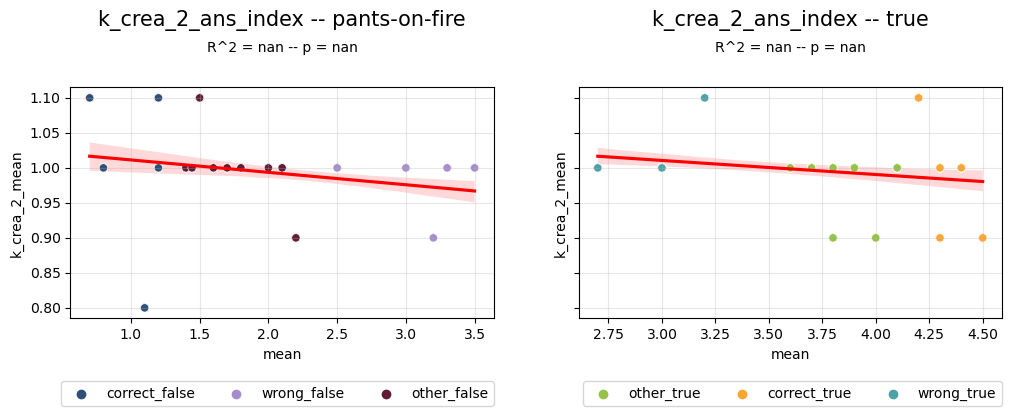

k_ai_2_ans_index


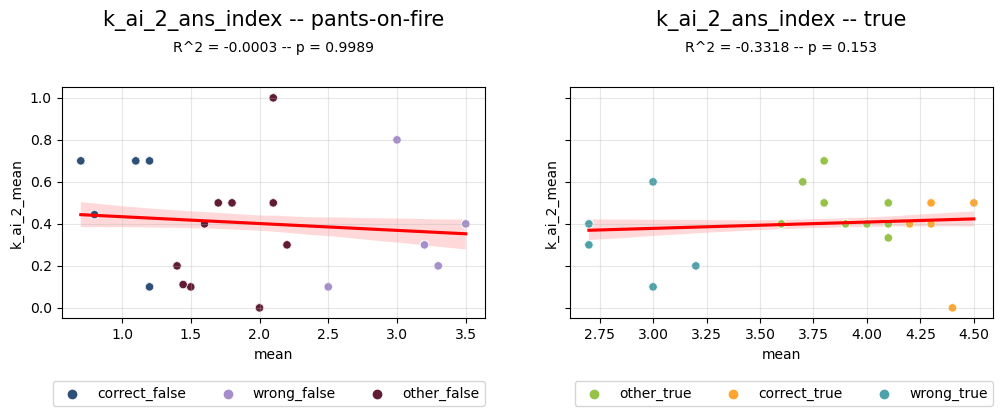

k_ai_4_ans_index


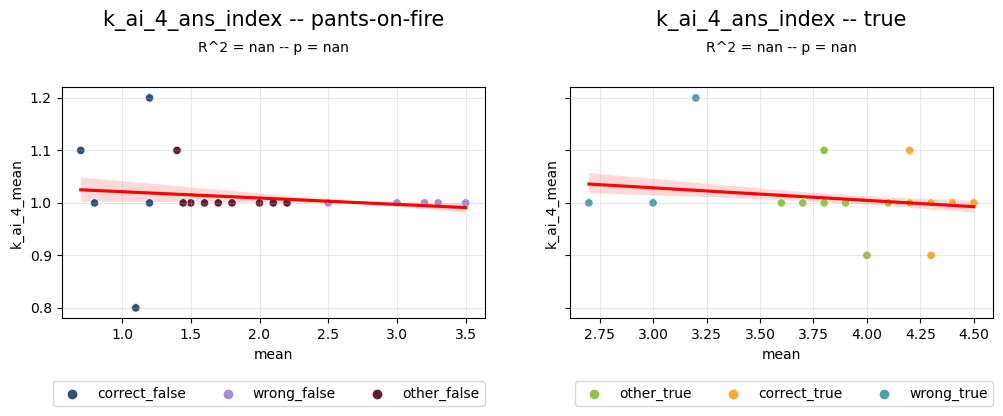

In [123]:
sub = df_for_Q1[df_for_Q1["sovra"] != "other"]

for dimensione in dimensioni_da_analizzare_per_regressione_3:
    sub[dimensione[:-10]+"_mean"] = 0

for statement in sub["doc_id"].unique():
    #sovra = sub[sub["doc_id"] == statement]["sovra"].unique()[0]  
    for dim in dimensioni_da_analizzare_per_regressione_3:
        mean = np.asarray(sub[sub["doc_id"] == statement][dim],dtype = np.float64).mean()
        df_for_Q1.loc[df_for_Q1["doc_id"] == statement, dim[:-10]+"_mean"] = mean 
        
plot_regressione_lineare_RQ(df_for_Q1,dimensioni_da_analizzare_per_regressione_3,10)

## Analisi scarto medio

In [124]:
analizza_scarto(df_for_Q1,quartili,dimensioni_da_analizzare)

quartile vs all =>  k_info_1_ans_index correct_false -> 0.03235791116769666
quartile vs sovra =>  k_info_3_ans_index correct_false -> 4.10946215291646e-06
quartile vs sovra =>  k_info_3_ans_index wrong_true -> 0.0027893146311489766
quartile vs all =>  k_info_3_ans_index wrong_true -> 0.013031051941733386
quartile vs sovra =>  k_crea_2_ans_index correct_false -> 0.034623977337485345
quartile vs sovra =>  k_crea_2_ans_index wrong_true -> 6.6090401831693056e-12
quartile vs sovra =>  k_ai_4_ans_index wrong_false -> 0.0008385613547168949
quartile vs all =>  k_ai_4_ans_index wrong_false -> 7.413319346121931e-05
quartile vs sovra =>  k_ai_4_ans_index wrong_true -> 0.0019706435792220768
quartile vs all =>  k_ai_4_ans_index wrong_true -> 1.6677031325103033e-17
quartile vs all =>  k_ai_4_ans_index correct_true -> 0.0028229130743707117


## Worker medio

In [125]:
df_worker_medio = []
for col in colonne:
    if col[-5:] == "index":
        mean = np.asarray(df_for_Q1[col],dtype = np.float64).mean()
        df_worker_medio.append([col[:-10], mean, mapping[col[:-10]][str(round(mean))+".0"]])
        
df_worker_medio = pd.DataFrame(df_worker_medio, columns = ["dimensione","media","label"])
df_worker_medio

,dimensione,media,label
0,age,2.728416,36-50
1,school,2.920369,Four year college degree/bachelorâs degree
2,taxes,5.221291,"50,000$ to less than 75,000$"
3,political_views,2.497904,Moderate
4,consideration,1.109807,Democrat
5,southern_border,0.879296,Disagree
6,s_info_1,3.683152,completely_true
7,s_info_3_v2,3.813915,completely_true
8,s_info_4,3.808885,completely_true
9,s_info_5,3.466890,slightly_true


## Salvo Dati

In [126]:
df_for_Q1.to_csv(index=False, path_or_buf = "../Datasets/df_Q1.csv")

In [56]:
for variabile_interesse in ["scarto","doc_truthfulness_index", "mean"]:
    for df in DF_no_quartili:
        results = ols(
            f'''
                {variabile_interesse} ~ C(age_ans_label) + C(school_ans_label) + C(political_views_ans_label) + C(consideration_ans_label) + C(southern_border_ans_label) + C(k_info_1_ans_label) + C(k_ai_4_ans_label) + C(s_com_1_v2_ans_label) + C(s_info_4_ans_label)"""
            '''
            , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > valore_soglia:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ C(age_ans_label) + C(school_ans_label) + C(political_views_ans_label) + C(consideration_ans_label) + C(southern_border_ans_label) + C(k_info_1_ans_label) + C(k_ai_4_ans_label) + C(s_com_1_v2_ans_label) + C(s_info_4_ans_label) in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > valore_soglia:
                print(index)
                tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                        groups=df[1][index[2:-1]], 
                                        alpha=0.05)
                
                df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))

----------------------------------------------------------------------------------------------------
scarto ~ C(age_ans_label) + C(school_ans_label) + C(political_views_ans_label) + C(consideration_ans_label) + C(southern_border_ans_label) + C(k_info_1_ans_label) + C(k_ai_4_ans_label) + C(s_com_1_v2_ans_label) + C(s_info_4_ans_label) in df_correct


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(southern_border_ans_label),7.457124,2.0,3.728562,3.527865,0.034139,0.065388,0.046423
C(k_info_1_ans_label),5.439502,2.0,2.719751,2.573355,0.082743,0.047697,0.028894
C(k_ai_4_ans_label),5.092311,3.0,1.697437,1.606069,0.194725,0.044652,0.016695
C(age_ans_label),5.045659,3.0,1.681886,1.591356,0.198198,0.044243,0.016290
C(s_info_4_ans_label),2.441484,2.0,1.220742,1.155033,0.320376,0.021408,0.002847
C(consideration_ans_label),0.499490,3.0,0.166497,0.157535,0.924526,0.004380,-0.023207
C(s_com_1_v2_ans_label),3.088743,6.0,0.514790,0.487081,0.816116,0.027084,-0.028259
C(political_views_ans_label),2.005922,5.0,0.401184,0.379590,0.861324,0.017589,-0.028484
C(school_ans_label),0.536002,5.0,0.107200,0.101430,0.991558,0.004700,-0.041255
Residual,82.437345,78.0,1.056889,NaN,NaN,NaN,NaN


C(southern_border_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject
0,Agree,Disagree,-0.5691,0.0462,-1.1305,-0.0076,True


----------------------------------------------------------------------------------------------------
mean ~ C(age_ans_label) + C(school_ans_label) + C(political_views_ans_label) + C(consideration_ans_label) + C(southern_border_ans_label) + C(k_info_1_ans_label) + C(k_ai_4_ans_label) + C(s_com_1_v2_ans_label) + C(s_info_4_ans_label) in df_false


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(s_info_4_ans_label),7.931752,4.0,1.982938,3.266688,0.013143,0.062980,0.043491
C(k_ai_4_ans_label),3.421221,3.0,1.140407,1.878704,0.135224,0.027165,0.012645
C(s_com_1_v2_ans_label),5.207603,6.0,0.867934,1.429832,0.206133,0.041350,0.012371
C(political_views_ans_label),3.485352,5.0,0.697070,1.148352,0.337085,0.027675,0.003558
C(k_info_1_ans_label),1.628484,2.0,0.814242,1.341380,0.264355,0.012931,0.003275
C(age_ans_label),2.913686,5.0,0.582737,0.960000,0.444085,0.023135,-0.000959
C(southern_border_ans_label),0.343327,2.0,0.171664,0.282798,0.754041,0.002726,-0.006881
C(school_ans_label),1.776234,5.0,0.355247,0.585233,0.711276,0.014104,-0.009948
C(consideration_ans_label),0.288519,3.0,0.096173,0.158435,0.924117,0.002291,-0.012110
Residual,98.943913,163.0,0.607018,NaN,NaN,NaN,NaN


C(s_info_4_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject


----------------------------------------------------------------------------------------------------
mean ~ C(age_ans_label) + C(school_ans_label) + C(political_views_ans_label) + C(consideration_ans_label) + C(southern_border_ans_label) + C(k_info_1_ans_label) + C(k_ai_4_ans_label) + C(s_com_1_v2_ans_label) + C(s_info_4_ans_label) in df_correct


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(k_info_1_ans_label),21.443973,2.0,10.721986,3.736312,0.028212,0.071607,0.051944
C(s_info_4_ans_label),11.401562,2.0,5.700781,1.986563,0.144046,0.038073,0.018728
C(age_ans_label),6.194771,3.0,2.064924,0.719568,0.543279,0.020686,-0.007985
C(southern_border_ans_label),2.667570,2.0,1.333785,0.464787,0.629998,0.008908,-0.010160
C(school_ans_label),10.907597,5.0,2.181519,0.760198,0.581232,0.036424,-0.011381
C(political_views_ans_label),9.133823,5.0,1.826765,0.636576,0.672410,0.030500,-0.017247
C(k_ai_4_ans_label),2.714103,3.0,0.904701,0.315263,0.814294,0.009063,-0.019498
C(s_com_1_v2_ans_label),11.147319,6.0,1.857887,0.647421,0.691979,0.037224,-0.020079
C(consideration_ans_label),0.020793,3.0,0.006931,0.002415,0.999835,0.000069,-0.028406
Residual,223.834330,78.0,2.869671,NaN,NaN,NaN,NaN


C(k_info_1_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject
0,definetely_true,definetely_untrue,1.3442,0.0163,0.2058,2.4826,True


<Axes: xlabel='k_info_1_ans_label'>

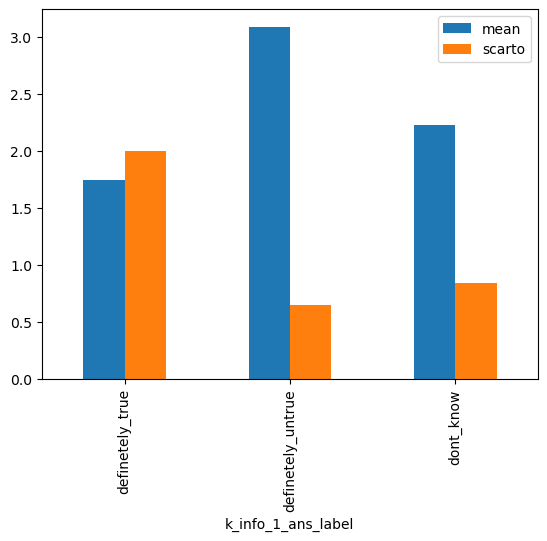

In [61]:
df_correct.groupby("k_info_1_ans_label").mean()[["mean","scarto"]].plot.bar()

In [68]:
df_all["quartile"]

0               other
1               other
2       correct_false
3               other
4               other
            ...      
1194            other
1195            other
1196       wrong_true
1197            other
1198            other
Name: quartile, Length: 1193, dtype: object

In [82]:
valore_soglia = 0.04

In [88]:
import warnings
warnings.filterwarnings('ignore')


In [89]:
for variabile_interesse in ["scarto","doc_truthfulness_index", "mean"]:
    for df in DF_no_quartili:
        results = ols(
            f'''
                {variabile_interesse} ~ C(age_ans_label)*C(southern_border_ans_label)*C(k_info_1_ans_label)*C(k_ai_4_ans_label)*C(s_com_1_v2_ans_label)*C(s_info_4_ans_label)"""
            '''
            , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > valore_soglia:
            print("-" * 100)
            print(f"""{variabile_interesse} ~C(age_ans_label)*C(southern_border_ans_label)*C(k_info_1_ans_label)*C(k_ai_4_ans_label)*C(s_com_1_v2_ans_label)*C(s_info_4_ans_label) in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > valore_soglia:
                print(index)
                tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                        groups=df[1][index[2:-1]], 
                                        alpha=0.05)
                
                df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))

In [85]:
for variabile_interesse in ["correct_true", "wrong_true"]:
    for df in [["df_all",df_all], ["df_true",df_true]]:
        
        results = ols(
            f'''
                {variabile_interesse} ~ C(age_ans_label)*C(southern_border_ans_label)*C(k_info_1_ans_label)*C(k_ai_4_ans_label)*C(s_com_1_v2_ans_label)*C(s_info_4_ans_label)"""
            '''
            , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > valore_soglia:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ C(age_ans_label) + C(school_ans_label) + C(political_views_ans_label) + C(consideration_ans_label) + C(southern_border_ans_label) + C(k_info_1_ans_label) + C(k_ai_4_ans_label) + C(s_com_1_v2_ans_label) + C(s_info_4_ans_label) in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > valore_soglia:
                print(index)
                tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                        groups=df[1][index[2:-1]], 
                                        alpha=0.05)
                
                df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))

d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 0
  warnings.warn('covariance of constraints does not have full '
d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 0
  warnings.warn('covariance of constraints does not have full '
d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 0
  warnings.warn('covariance of constraints does not have full '
d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 0
  warnin

KeyboardInterrupt: 

In [80]:
for variabile_interesse in ["correct_false", "wrong_false"]:
    for df in [["df_all",df_all], ["df_false",df_false]]:
        
        results = ols(
            f'''
                {variabile_interesse} ~ C(age_ans_label) + C(school_ans_label) + C(political_views_ans_label) + C(consideration_ans_label) + C(southern_border_ans_label) + C(k_info_1_ans_label) + C(k_ai_4_ans_label) + C(s_com_1_v2_ans_label) + C(s_info_4_ans_label)"""
            '''
            , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > valore_soglia:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ C(age_ans_label) + C(school_ans_label) + C(political_views_ans_label) + C(consideration_ans_label) + C(southern_border_ans_label) + C(k_info_1_ans_label) + C(k_ai_4_ans_label) + C(s_com_1_v2_ans_label) + C(s_info_4_ans_label) in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > valore_soglia:
                print(index)
                tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                        groups=df[1][index[2:-1]], 
                                        alpha=0.05)
                
                df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))
        

----------------------------------------------------------------------------------------------------
correct_false ~ C(age_ans_label) + C(school_ans_label) + C(political_views_ans_label) + C(consideration_ans_label) + C(southern_border_ans_label) + C(k_info_1_ans_label) + C(k_ai_4_ans_label) + C(s_com_1_v2_ans_label) + C(s_info_4_ans_label) in df_all


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(s_com_1_v2_ans_label),0.383101,6.0,0.063850,1.615862,0.139187,0.008187,0.003118
C(k_ai_4_ans_label),0.247406,3.0,0.082469,2.087043,0.100194,0.005287,0.002751
C(k_info_1_ans_label),0.072813,2.0,0.036407,0.921345,0.398275,0.001556,-0.000133
C(s_info_4_ans_label),0.119758,4.0,0.029939,0.757679,0.552922,0.002559,-0.000818
C(southern_border_ans_label),0.022201,2.0,0.011101,0.280927,0.755135,0.000474,-0.001213
C(consideration_ans_label),0.022246,3.0,0.007415,0.187663,0.904826,0.000475,-0.002056
C(political_views_ans_label),0.068516,5.0,0.013703,0.346789,0.884475,0.001464,-0.002756
C(school_ans_label),0.055734,5.0,0.011147,0.282095,0.923058,0.001191,-0.003029
C(age_ans_label),0.044876,5.0,0.008975,0.227136,0.950814,0.000959,-0.003260
Residual,45.757891,1158.0,0.039515,NaN,NaN,NaN,NaN


C(k_ai_4_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject


C(s_com_1_v2_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject


----------------------------------------------------------------------------------------------------
correct_false ~ C(age_ans_label) + C(school_ans_label) + C(political_views_ans_label) + C(consideration_ans_label) + C(southern_border_ans_label) + C(k_info_1_ans_label) + C(k_ai_4_ans_label) + C(s_com_1_v2_ans_label) + C(s_info_4_ans_label) in df_false


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(s_com_1_v2_ans_label),2.298832,6.0,0.383139,2.113912,0.054353,0.064302,0.033713
C(k_ai_4_ans_label),1.481020,3.0,0.493673,2.723772,0.046066,0.041427,0.026085
C(k_info_1_ans_label),0.436813,2.0,0.218406,1.205025,0.302340,0.012218,0.002068
C(s_info_4_ans_label),0.721693,4.0,0.180423,0.995459,0.411721,0.020187,-0.000092
C(southern_border_ans_label),0.129624,2.0,0.064812,0.357592,0.699905,0.003626,-0.006481
C(consideration_ans_label),0.134650,3.0,0.044883,0.247637,0.862930,0.003766,-0.011385
C(political_views_ans_label),0.403107,5.0,0.080621,0.444817,0.816595,0.011276,-0.014002
C(school_ans_label),0.334564,5.0,0.066913,0.369182,0.869175,0.009358,-0.015910
C(age_ans_label),0.267042,5.0,0.053408,0.294673,0.915345,0.007470,-0.017789
Residual,29.543140,163.0,0.181246,NaN,NaN,NaN,NaN


C(k_info_1_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject
2,definetely_untrue,dont_know,0.2653,0.0422,0.0074,0.5232,True


C(k_ai_4_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject


C(s_com_1_v2_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject


----------------------------------------------------------------------------------------------------
wrong_false ~ C(age_ans_label) + C(school_ans_label) + C(political_views_ans_label) + C(consideration_ans_label) + C(southern_border_ans_label) + C(k_info_1_ans_label) + C(k_ai_4_ans_label) + C(s_com_1_v2_ans_label) + C(s_info_4_ans_label) in df_all


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(s_info_4_ans_label),0.354964,4.0,0.088741,2.199994,0.066996,0.007410,0.004038
C(political_views_ans_label),0.240917,5.0,0.048183,1.194522,0.309643,0.005029,0.000818
C(age_ans_label),0.194029,5.0,0.038806,0.962039,0.439956,0.004050,-0.000160
C(k_info_1_ans_label),0.037718,2.0,0.018859,0.467537,0.626662,0.000787,-0.000896
C(school_ans_label),0.157132,5.0,0.031426,0.779099,0.564778,0.003280,-0.000929
C(k_ai_4_ans_label),0.055856,3.0,0.018619,0.461576,0.709173,0.001166,-0.001359
C(southern_border_ans_label),0.005364,2.0,0.002682,0.066485,0.935681,0.000112,-0.001571
C(consideration_ans_label),0.013567,3.0,0.004522,0.112115,0.953035,0.000283,-0.002241
C(s_com_1_v2_ans_label),0.133648,6.0,0.022275,0.552216,0.768493,0.002790,-0.002260
Residual,46.710177,1158.0,0.040337,NaN,NaN,NaN,NaN


C(political_views_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject


C(s_info_4_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject


----------------------------------------------------------------------------------------------------
wrong_false ~ C(age_ans_label) + C(school_ans_label) + C(political_views_ans_label) + C(consideration_ans_label) + C(southern_border_ans_label) + C(k_info_1_ans_label) + C(k_ai_4_ans_label) + C(s_com_1_v2_ans_label) + C(s_info_4_ans_label) in df_false


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(s_info_4_ans_label),2.117206,4.0,0.529302,2.852306,0.025520,0.056656,0.036611
C(political_views_ans_label),1.451441,5.0,0.290288,1.564308,0.172992,0.038840,0.013942
C(age_ans_label),1.141690,5.0,0.228338,1.230470,0.297152,0.030551,0.005694
C(school_ans_label),0.931295,5.0,0.186259,1.003715,0.417337,0.024921,0.000092
C(k_info_1_ans_label),0.227348,2.0,0.113674,0.612568,0.543200,0.006084,-0.003829
C(k_ai_4_ans_label),0.337921,3.0,0.112640,0.606998,0.611365,0.009043,-0.005826
C(s_com_1_v2_ans_label),0.796923,6.0,0.132820,0.715744,0.637420,0.021325,-0.008427
C(southern_border_ans_label),0.034839,2.0,0.017420,0.093871,0.910449,0.000932,-0.008955
C(consideration_ans_label),0.083174,3.0,0.027725,0.149403,0.929952,0.002226,-0.012609
Residual,30.247861,163.0,0.185570,NaN,NaN,NaN,NaN


C(age_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject


C(school_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject


C(political_views_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject


C(s_info_4_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject
